# Exploration des forms et des mots

## Définition des constantes

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
from lxml import etree  # pour la fonction get_words_from_xml_form()
import glob  # pour la fonction get_files()
from collections import Counter


In [2]:
words_meta_filename = "../data/ascii/words.txt"
forms_meta_filename = "../data/ascii/forms.txt"
xml_files_path = "../data/xml"

#FORMS_IMG_PATH = '../data/forms'
WORDS_IMG_PATH = '../data/words'

word_columns = ['word_id', 'seg_res', 'gray_level', 'x', 'y', 'w', 'h', 'tag', 'transcription']
forms_columns = ['form_id', 'writer_id', 'number_of_sentences', 'word_seg', 'total_lines', 'correct_lines', 'total_words', 'correct_words']


## Preprocessing

### Lecture des données des forms dans un DF : form_df

In [3]:
def parse_my_form_file(filename):
    with open(filename) as f:
        for line in f:
            if line.startswith('#'):
                continue
            yield line.strip().split(' ')

form_df = pd.DataFrame(parse_my_form_file(forms_meta_filename), columns=forms_columns)

In [4]:
form_df[['total_lines', 'correct_lines', 'total_words', 'correct_words']] = form_df[['total_lines', 'correct_lines', 'total_words', 'correct_words']].astype(int)

In [5]:
form_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1539 entries, 0 to 1538
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   form_id              1539 non-null   object
 1   writer_id            1539 non-null   object
 2   number_of_sentences  1539 non-null   object
 3   word_seg             1539 non-null   object
 4   total_lines          1539 non-null   int64 
 5   correct_lines        1539 non-null   int64 
 6   total_words          1539 non-null   int64 
 7   correct_words        1539 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 96.3+ KB


In [6]:
print('Le dataset des forms dispose de ' + str(form_df.shape[0]) +' entrées.')

Le dataset des forms dispose de 1539 entrées.


In [7]:
def get_form_img_path_by_form_id(form_id):
    first_letter = form_id[0]
    if first_letter in ['a', 'b', 'c', 'd']:
        base_path = "../data/formsA-D/" 
    elif first_letter in ['e', 'f', 'g', 'h']:
        base_path = "../data/formsE-H/" 
    else:
        base_path = "../data/formsI-Z/" 
    return base_path + form_id +'.png'

In [8]:
form_df['text_id'] = form_df.form_id.apply(lambda x: x[:3])
form_df = form_df[['form_id', 'writer_id', 'text_id', 'number_of_sentences', 'word_seg',
       'total_lines', 'correct_lines', 'total_words', 'correct_words']]

In [9]:
form_df['form_img_path'] = form_df['form_id'].apply(lambda x: get_form_img_path_by_form_id(x))

In [10]:
form_df.head()

form_id writer_id text_id number_of_sentences word_seg  total_lines  \
0  a01-000u       000     a01                   2      prt            7   
1  a01-000x       001     a01                   2      all            6   
2   a01-003       002     a01                   3      prt           11   
3  a01-003u       000     a01                   3      prt           11   
4  a01-003x       003     a01                   3      prt            9   

   correct_lines  total_words  correct_words                  form_img_path  
0              5           52             36  ../data/formsA-D/a01-000u.png  
1              6           52             52  ../data/formsA-D/a01-000x.png  
2             10           81             71   ../data/formsA-D/a01-003.png  
3             10           80             73  ../data/formsA-D/a01-003u.png  
4              6           82             56  ../data/formsA-D/a01-003x.png

In [11]:
%%time
#Vérification de la possibilité d'ouvrir tous les fichiers des forms

list_corrupt=[]
for i in range(len(form_df)):
    try:
        plt.imread(form_df.form_img_path.iloc[i])
    except:
        print('Problème indice', str(i))
        list_corrupt.append(i)

if len(list_corrupt)==0: print('Tous les fichiers des forms sont accessibles')

Tous les fichiers des forms sont accessibles
CPU times: user 1min 4s, sys: 1.85 s, total: 1min 6s
Wall time: 1min 18s


### Lecture des données des mots dans un DF : df

In [12]:
# COMMENTAIRE DB : par un soucis de cohérence, ce DF devrait s'appeler 'word_df'. mais comme on l'utilise beaucoup, pour l'instant il reste en 'df'

def parse_my_file(filename):
    with open(filename) as f:
        for line in f:
            if line.startswith('#'):
                continue
            yield line.strip().split(' ',len(word_columns) - 1)

df = pd.DataFrame(parse_my_file(words_meta_filename), columns=word_columns)

In [13]:
df['x'] = df['x'].astype(int)
df['y'] = df['y'].astype(int)
df['w'] = df['w'].astype(int)
df['h'] = df['h'].astype(int)
df['seg_res'].replace(['ok', 'err'], [1, 0], inplace=True) 
df['gray_level'] = df['gray_level'].astype(int)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115320 entries, 0 to 115319
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   word_id        115320 non-null  object
 1   seg_res        115320 non-null  int64 
 2   gray_level     115320 non-null  int64 
 3   x              115320 non-null  int64 
 4   y              115320 non-null  int64 
 5   w              115320 non-null  int64 
 6   h              115320 non-null  int64 
 7   tag            115320 non-null  object
 8   transcription  115320 non-null  object
dtypes: int64(6), object(3)
memory usage: 7.9+ MB


In [15]:
print('Le dataset des mots dispose de ' + str(df.shape[0]) +' entrées.')

Le dataset des mots dispose de 115320 entrées.


In [16]:
def get_word_image_path_by_word_id(word_id):
    path_parts = word_id.split('-')
    return WORDS_IMG_PATH + '/' + path_parts[0] + '/' + "-".join(path_parts[0:2]) + '/' + word_id+ '.png'

def get_form_img_path_by_word_id(word_id):
    path_parts = word_id.split('-')
    first_letter = path_parts[0][0].lower()
    if first_letter in ['a', 'b', 'c', 'd']:
        base_path = "../data/formsA-D/" 
    elif first_letter in ['e', 'f', 'g', 'h']:
        base_path = "../data/formsE-H/" 
    else:
        base_path = "../data/formsI-Z/" 
    return base_path + "-".join(path_parts[0:2]) + '.png'



In [17]:
df['word_img_path'] = df['word_id'].apply(lambda x: get_word_image_path_by_word_id(x))
df['form_img_path'] = df['word_id'].apply(lambda x: get_form_img_path_by_word_id(x))

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115320 entries, 0 to 115319
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   word_id        115320 non-null  object
 1   seg_res        115320 non-null  int64 
 2   gray_level     115320 non-null  int64 
 3   x              115320 non-null  int64 
 4   y              115320 non-null  int64 
 5   w              115320 non-null  int64 
 6   h              115320 non-null  int64 
 7   tag            115320 non-null  object
 8   transcription  115320 non-null  object
 9   word_img_path  115320 non-null  object
 10  form_img_path  115320 non-null  object
dtypes: int64(6), object(5)
memory usage: 9.7+ MB


In [19]:
%%time
#Vérification de la possibilité d'ouvrir tous les fichiers des mots

list_corrupt=[]
for i in range(len(df)):
    try:
        plt.imread(df.word_img_path.iloc[i])
    except:
        print('Problème indice', str(i))
        list_corrupt.append(i)

if len(list_corrupt)==0: print('Tous les fichiers des mots sont accessibles')

Problème indice 4152
Problème indice 113621
CPU times: user 30.3 s, sys: 3.43 s, total: 33.7 s
Wall time: 45.1 s


In [20]:
df_original = df

df = df.drop(index = list_corrupt).reset_index()

Deux fichiers de mots sont corrompus [4152, 113621]. Ils sont écartés de df.

In [21]:
print('mots scannés : ' + str(df.shape[0]))
print('mots avec segmentation OK : ' + str(df['seg_res'].value_counts()[1]))

mots scannés : 115318
mots avec segmentation OK : 96454


Le dataset dispose de 115318 mots scannés, dont 96454 mots avec segmentation OK.

In [22]:
df.head()

index         word_id  seg_res  gray_level     x    y    w   h  tag  \
0      0  a01-000u-00-00        1         154   408  768   27  51   AT   
1      1  a01-000u-00-01        1         154   507  766  213  48   NN   
2      2  a01-000u-00-02        1         154   796  764   70  50   TO   
3      3  a01-000u-00-03        1         154   919  757  166  78   VB   
4      4  a01-000u-00-04        1         154  1185  754  126  61  NPT   

  transcription                                  word_img_path  \
0             A  ../data/words/a01/a01-000u/a01-000u-00-00.png   
1          MOVE  ../data/words/a01/a01-000u/a01-000u-00-01.png   
2            to  ../data/words/a01/a01-000u/a01-000u-00-02.png   
3          stop  ../data/words/a01/a01-000u/a01-000u-00-03.png   
4           Mr.  ../data/words/a01/a01-000u/a01-000u-00-04.png   

                   form_img_path  
0  ../data/formsA-D/a01-000u.png  
1  ../data/formsA-D/a01-000u.png  
2  ../data/formsA-D/a01-000u.png  
3  ../data/formsA-D/a01-000u.png  
4  ../data/formsA-D/a01-000u.png

## Outils de rendering

### Affichage des forms et des mots

In [23]:
def show_img(path):
    img = plt.imread(path)
    plt.figure(figsize = (20,10))
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap='gray')

def show_word_image_by_line(line):
    show_img(line.word_img_path)

def show_form_img_by_word_id(line):
    show_img(line.form_img_path)

In [24]:
#show_word_image_by_line(df.iloc[0])

In [25]:
#show_form_img_by_word_id(df.iloc[0])

### Affichage des contours sur les forms

In [26]:
def plot_bounding_box(line):
    img = plt.imread(line.form_img_path)

    fig, ax = plt.subplots(figsize=(20,15))
    fig.figsize=(20,10)
    ax.imshow(img, cmap='gray')

    ax.add_patch(
        patches.Rectangle(
            (line.x-8, line.y-8),
            line.w+16,
            line.h+16,
            fill=False,
            color = 'red'      
        ) ) 
    plt.axis('off')
    plt.show()

def show_img_ax(path,ax):
    img = plt.imread(path)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(img, cmap='gray')

def show_word_image_by_line_ax(line,ax):
    show_img_ax(line.word_img_path,ax)

def show_form_img_by_word_id_ax(line,ax):
    show_img_ax(line.form_img_path,ax)
    
def plot_bounding_box_ax(line,ax):
    img = plt.imread(line.form_img_path)

    ax.imshow(img, cmap='gray')

    ax.add_patch(
        patches.Rectangle(
            (line.x-8, line.y-8),
            line.w+16,
            line.h+16,
            fill=False,
            color = 'red'
        ) ) 
    ax.set_xticks([])
    ax.set_yticks([])

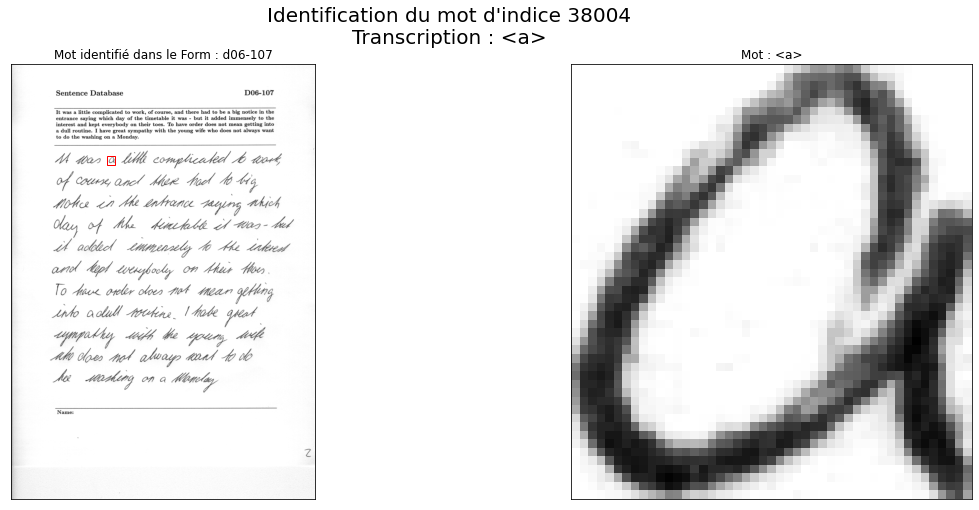

In [27]:
indice = np.random.randint(0, df.shape[0])

def plot_bounding_box_with_form(indice):    
    fig = plt.figure(figsize=(20,8))
    
    ax1 = fig.add_subplot(121)
    ax1.set_title('Mot identifié dans le Form : '+ str(df.word_id[indice][0:7]))
    plot_bounding_box_ax(df.iloc[indice],ax1)
    
    ax2 = fig.add_subplot(122)
    ax2.set_title('Mot : <'+ str(df.transcription[indice])+'>')
    show_word_image_by_line_ax(df.iloc[indice],ax2)

    fig.suptitle('Identification du mot d\'indice ' + str(indice) +'\nTranscription : <'+ str(df.transcription[indice])+'>', fontsize=20);

plot_bounding_box_with_form(indice)

## Analyse des Forms

### Représentation globale des forms

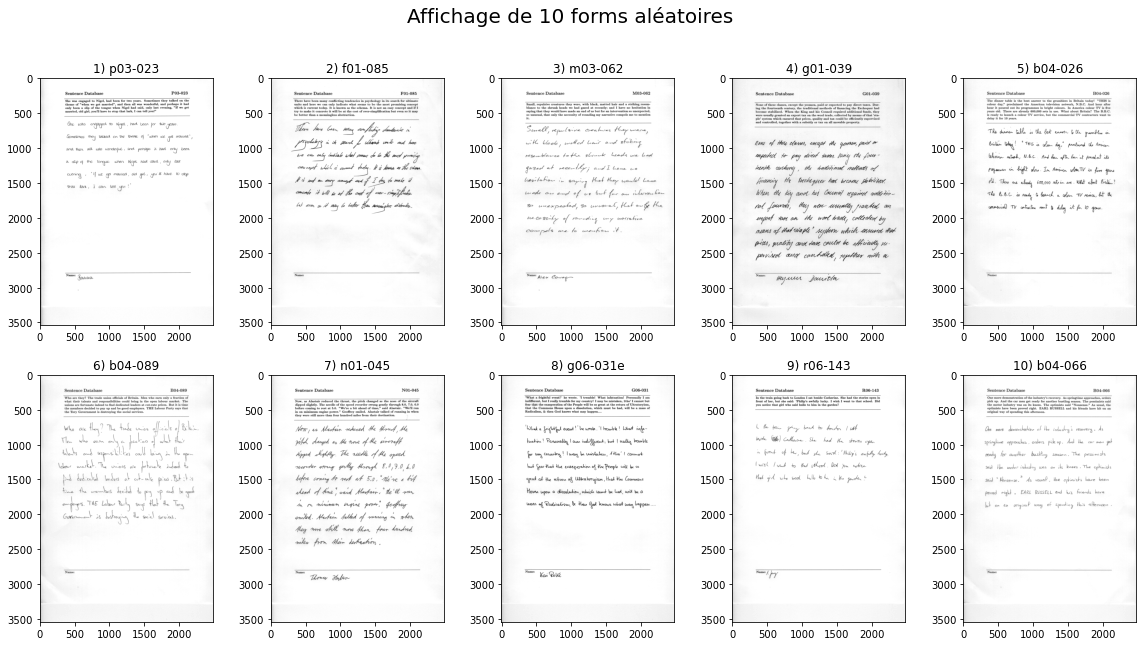

In [28]:
list_index = np.random.randint(0,form_df.shape[0], 10)

fig = plt.figure(figsize = (20,10))

for i in range(10):
    fig.add_subplot(2,5,i+1)
    j = list_index[i]
    plt.imshow(plt.imread(form_df.form_img_path[j]), cmap = 'gray')
    plt.title(str(i+1)+') '+ form_df.form_id[j])

fig.suptitle('Affichage de 10 forms aléatoires', fontsize = 20);

### Analyse du volume de lignes et mots par form

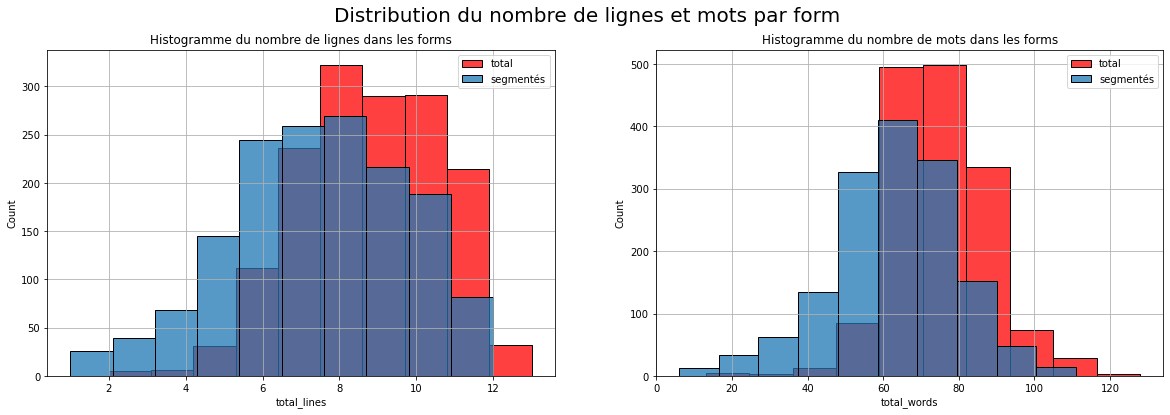

In [29]:
fig = plt.figure(figsize = (20,6))

ax1 = fig.add_subplot(121)
sns.histplot(x = 'total_lines' ,data = form_df, ax=ax1, color='red', label = 'total', bins=10)
sns.histplot(x = 'correct_lines' ,data = form_df, ax=ax1, label = 'segmentés', bins=10)
ax1.set_title('Histogramme du nombre de lignes dans les forms')
ax1.legend()
ax1.grid()

ax2 = fig.add_subplot(122)
sns.histplot(x = 'total_words' ,data = form_df, ax=ax2, color = 'red', label = 'total', bins=10)
sns.histplot(x = 'correct_words', data = form_df, ax=ax2, label = 'segmentés', bins=10)
ax2.set_title('Histogramme du nombre de mots dans les forms')
ax2.legend()
ax2.grid()

fig.suptitle('Distribution du nombre de lignes et mots par form', fontsize = 20);

### Analyse de la distribution de rédacteurs et de textes

In [30]:
nb_textes = len(form_df.text_id.unique())
nb_auteurs = len(form_df.writer_id.unique())

print('Le dataset de forms est constitué de '+str(nb_textes)+' textes uniques rédigés par '+str(nb_auteurs)+' rédacteurs.')
      

Le dataset de forms est constitué de 76 textes uniques rédigés par 657 rédacteurs.


In [31]:
count_per_writer_df = form_df[['writer_id', 'form_id']].groupby("writer_id").count()
count_per_writer_df.columns = ['nb_forms']
count_per_writer_df.head()

nb_forms
writer_id          
000              59
001               2
002               1
003               2
004               1

In [32]:
count_per_writer_df.describe()

nb_forms
count  657.000000
mean     2.342466
std      3.033337
min      1.000000
25%      1.000000
50%      1.000000
75%      2.000000
max     59.000000

''

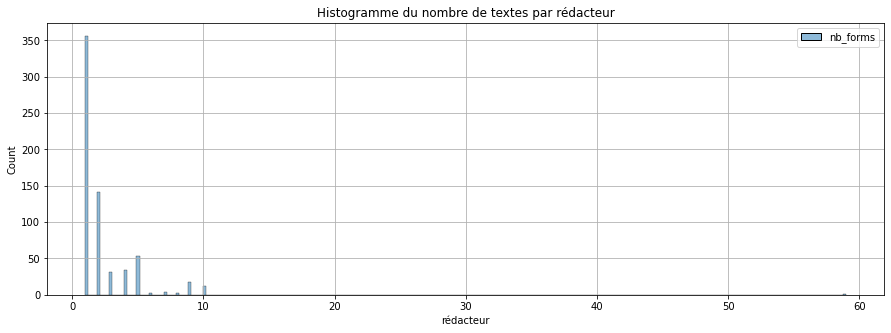

In [33]:
plt.figure(figsize=(15,5))
sns.histplot(count_per_writer_df)
plt.xlabel('rédacteur')
plt.title('Histogramme du nombre de textes par rédacteur')
plt.grid()
;

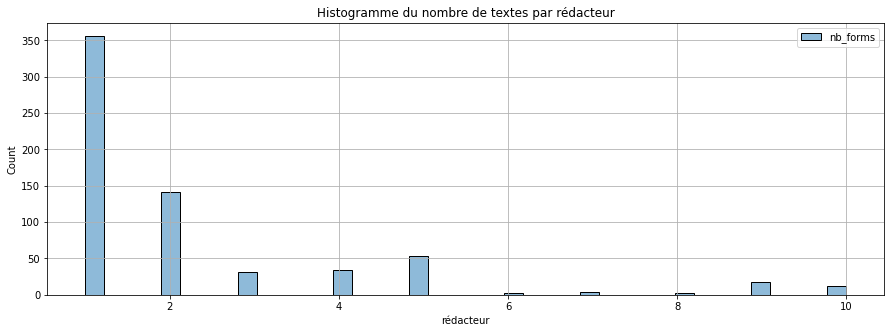

In [34]:
plt.figure(figsize=(15,5))
sns.histplot(count_per_writer_df[count_per_writer_df['nb_forms'] < 50])
plt.xlabel('rédacteur')
plt.title('Histogramme du nombre de textes par rédacteur')
plt.grid();

On remarque une moyenne de 2,34 forms par rédacteur et un écart moyen de l'ordre de 3 avec un minimum de 1 et un maximum de 59: Il semble donc y avoir un/des outliers.

In [35]:
count_per_writer_df.sort_values(by='nb_forms',ascending = False).head()

nb_forms
writer_id          
000              59
150              10
670              10
635              10
588              10

Le rédacteur ayant l'identifiant 000 a un volume beaucoup plus important que tous les autres rédacteurs.
Hypothèse à tester : l'indice 000 indique un rédacteur inconnu.

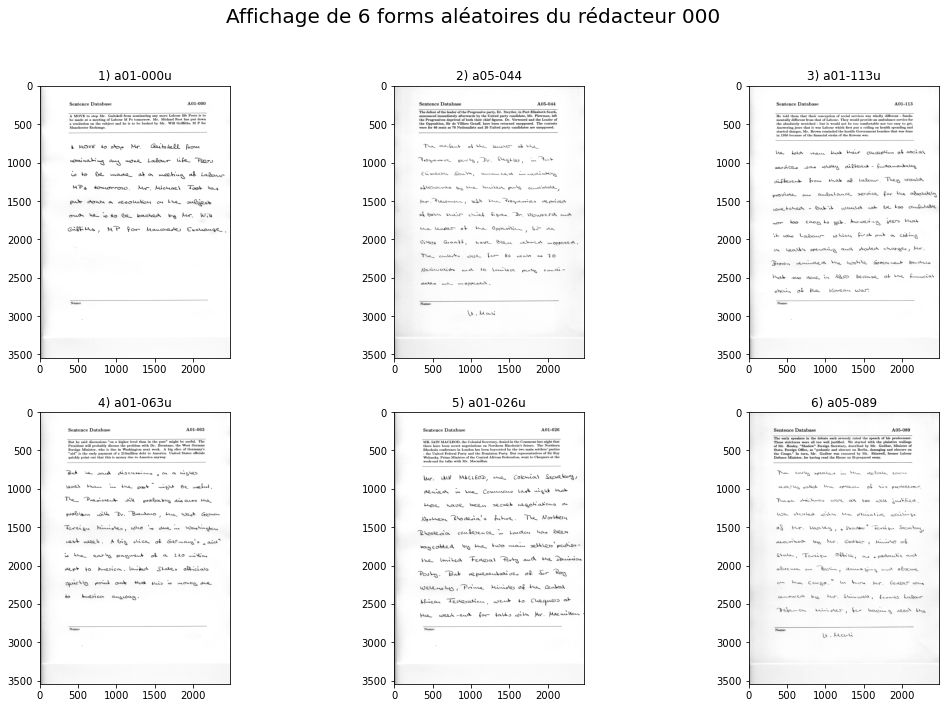

In [36]:
form_df_000 = form_df[form_df['writer_id']=='000'].reset_index()

n_lignes = 2
n_colonnes = 3
n_images = n_lignes * n_colonnes

list_index = np.random.randint(0,form_df_000.shape[0], n_images)

fig = plt.figure(figsize = (18,11))

for i in range(n_images):
    fig.add_subplot(n_lignes,n_colonnes,i+1)
    j = list_index[i]
    plt.imshow(plt.imread(form_df_000.form_img_path[j]), cmap = 'gray')
    plt.title(str(i+1)+') '+ form_df_000.form_id[j])
    
fig.suptitle('Affichage de '+str(n_images)+' forms aléatoires du rédacteur 000', fontsize = 20);

L'hypothèse n'est pas retenue. L'indice 000 semble indiquer un seul rédacteur.

''

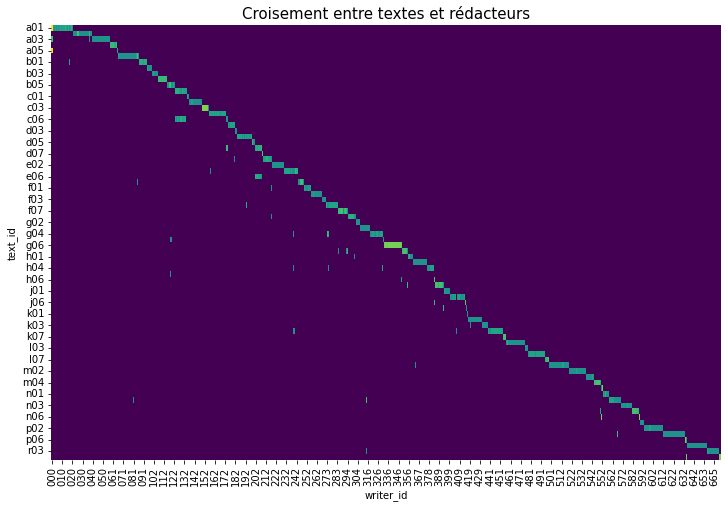

In [37]:
matrice = pd.crosstab(form_df['text_id'], form_df['writer_id'])

fig = plt.figure(figsize = (12,8))
sns.heatmap(matrice**.2, cmap = 'viridis',cbar = False)
plt.title('Croisement entre textes et rédacteurs', fontsize=15)
;

Cette visualisation en heatmap montre une matrice très diagonalisée avec de fines marches, ce qui veut dire que, globalement, chaque nouvel rédacteur a eu de nouveaux textes à rédiger. 

En conséquence, il n'y pas beaucoup de textes rédigés par différents rédacteurs.

## Analyse des mots

### Représentation globale des mots

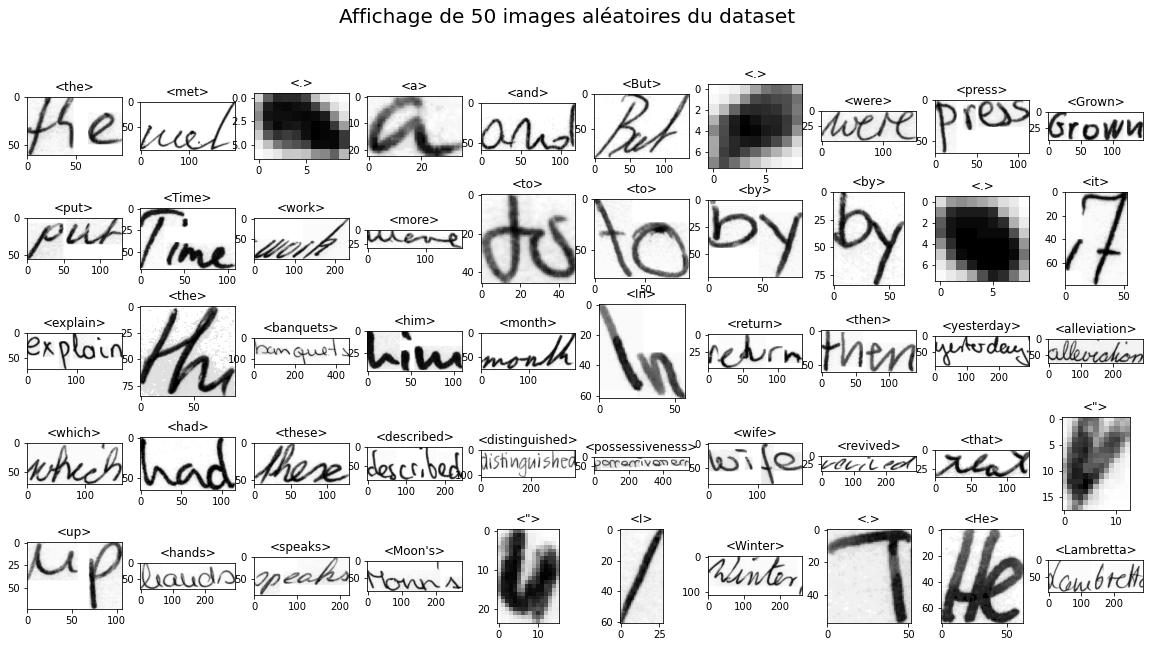

In [38]:
n_lignes = 5
n_colonnes = 10
n_images = n_lignes * n_colonnes

rand_list = np.sort(np.random.randint(0, df.shape[0],n_images))

fig = plt.figure(figsize = (20,10))

for i in range(n_images):
    fig.add_subplot(n_lignes,n_colonnes,i+1)
    plt.imshow(plt.imread(get_word_image_path_by_word_id(df.word_id.iloc[rand_list[i]])), cmap = 'gray')
    plt.title('<'+str(df.transcription[rand_list[i]])+'>')

fig.suptitle(t = 'Affichage de ' + str(n_images) + ' images aléatoires du dataset', fontsize = 20);

### Analyse du contraste des images mots

In [39]:
%%time

import cv2
#import numpy as np

def get_michelson_contrast(img_path):
    """
        Retourne le contraste de Michelson pour un chemin d'image donné
        Les valeurs possibles sont comprises entre 0 et 1 et vaut -1 en cas d'erreur
    """
    try:
        img = cv2.imread(img_path)
        Y = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)[:,:,0]
    except Exception:
        return -1
    min = int(np.min(Y))
    max = int(np.max(Y))
    if min == 0 and max == 0:
        return 0 
    return ((max - min) / (min + max))

df['michelson_contrast'] = df['word_img_path'].apply(lambda x: get_michelson_contrast(x))

CPU times: user 33.5 s, sys: 3.55 s, total: 37 s
Wall time: 48.5 s


In [40]:
df['michelson_contrast'].describe()

count    115318.000000
mean          0.699827
std           0.102718
min           0.000000
25%           0.650485
50%           0.717172
75%           0.764706
max           1.000000
Name: michelson_contrast, dtype: float64

#### Images avec contraste nul

In [41]:
bad_contrast_df = df[df['michelson_contrast'] == 0].reset_index()
#bad_contrast_df.head()

In [42]:
bad_contrast_df.shape

(132, 14)

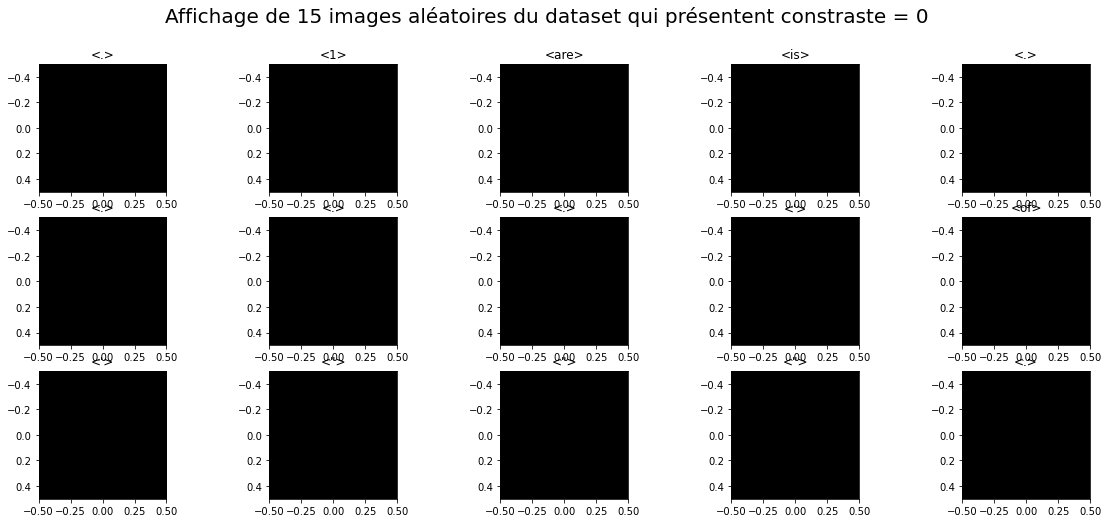

In [43]:
n_lignes = 3
n_colonnes = 5
n_images = n_lignes * n_colonnes

rand_list = np.sort(np.random.randint(0, bad_contrast_df.shape[0],n_images))

fig = plt.figure(figsize = (20,8))

for i in range(n_images):
    fig.add_subplot(n_lignes,n_colonnes,i+1)
    plt.imshow(plt.imread(get_word_image_path_by_word_id(bad_contrast_df.word_id.iloc[rand_list[i]])), cmap = 'gray')
    plt.title('<' + str(bad_contrast_df.transcription[rand_list[i]]) + '>')

fig.suptitle(t = 'Affichage de ' + str(n_images) + ' images aléatoires du dataset qui présentent constraste = 0', fontsize = 20);

In [44]:
#bad_contrast_df.transcription.value_counts()

In [45]:
#show_word_image_by_line(bad_contrast_df.iloc[0])


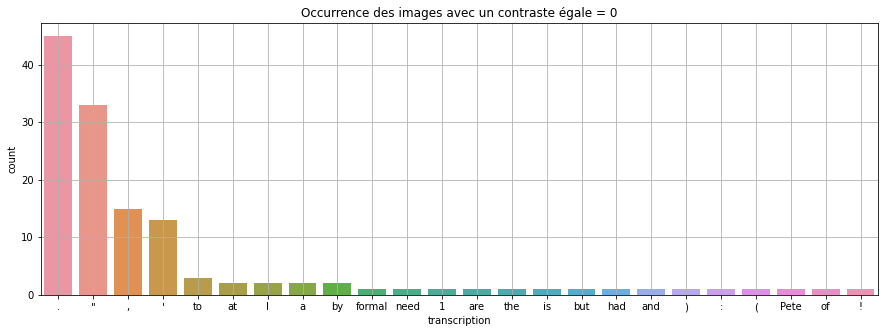

In [46]:
plt.figure(figsize=(15,5))
sns.countplot(x='transcription', data = bad_contrast_df, order = bad_contrast_df.transcription.value_counts().index)
plt.title('Occurrence des images avec un contraste égale = 0')
plt.grid();

Il a un total de 132 images avec une image de contraste nul avec un mélange de pontuaction et mots. Avant de retirer ces mots du dataset, on peut vérifier s'il apparaissent à d'autres indices du dataset pour s'assurer que leur représentativité n'est pas impactée.

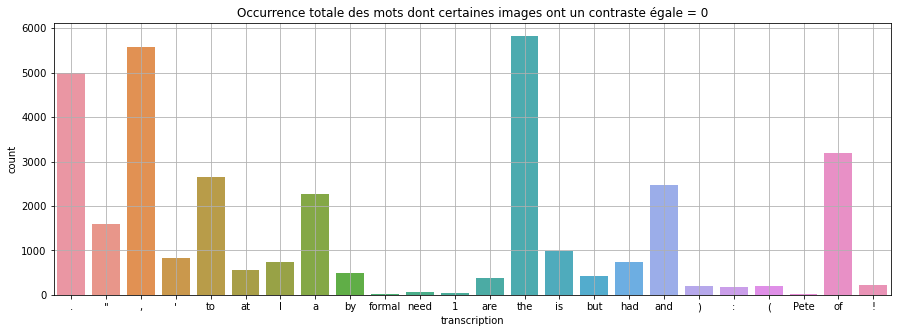

In [47]:
liste_mots_0 = bad_contrast_df.groupby('transcription').count().index
group_mots_0 = df[df.transcription.isin(liste_mots_0)]

plt.figure(figsize=(15,5))
sns.countplot(x='transcription', data = group_mots_0, order = bad_contrast_df.transcription.value_counts().index)
plt.title('Occurrence totale des mots dont certaines images ont un contraste égale = 0')
plt.grid()

In [48]:
df[df.transcription.isin(liste_mots_0)].groupby('transcription').count()['index'].sort_values()

transcription
Pete         7
formal       9
1           34
need        53
:          165
)          200
(          203
!          226
are        383
but        419
by         490
at         563
had        733
I          743
'          837
is         982
"         1599
a         2264
and       2475
to        2651
of        3192
.         4984
,         5570
the       5826
Name: index, dtype: int64

In [49]:
#show_word_image_by_line(df[df['michelson_contrast'] == 1].iloc[0])

In [50]:
df = df[df['michelson_contrast'] > 0]
df['michelson_contrast'].describe()

count    115186.000000
mean          0.700629
std           0.100006
min           0.085000
25%           0.650485
50%           0.717172
75%           0.764706
max           1.000000
Name: michelson_contrast, dtype: float64

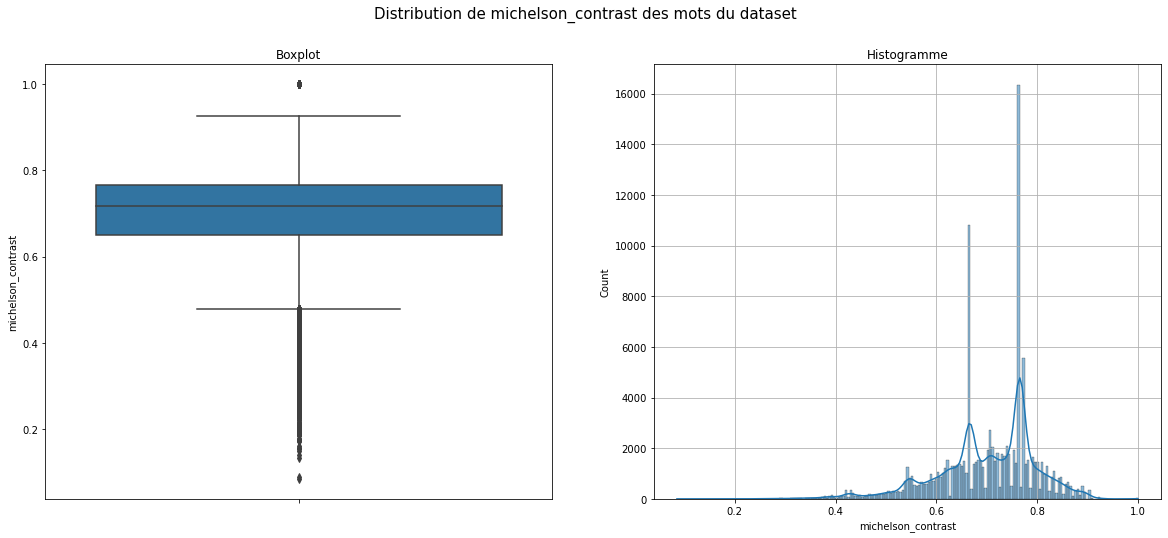

In [51]:
fig = plt.figure(figsize=(20,8))

ax1 = fig.add_subplot(121)
ax1.set_title('Boxplot')
sns.boxplot(y='michelson_contrast', data=df);

ax2 = fig.add_subplot(122)
sns.histplot(data = df, x= 'michelson_contrast', kde = True)
ax2.set_title('Histogramme')
plt.grid()

fig.suptitle('Distribution de michelson_contrast des mots du dataset', fontsize=15);



In [52]:
df.michelson_contrast.sort_values(ascending=True).index[0]

47272

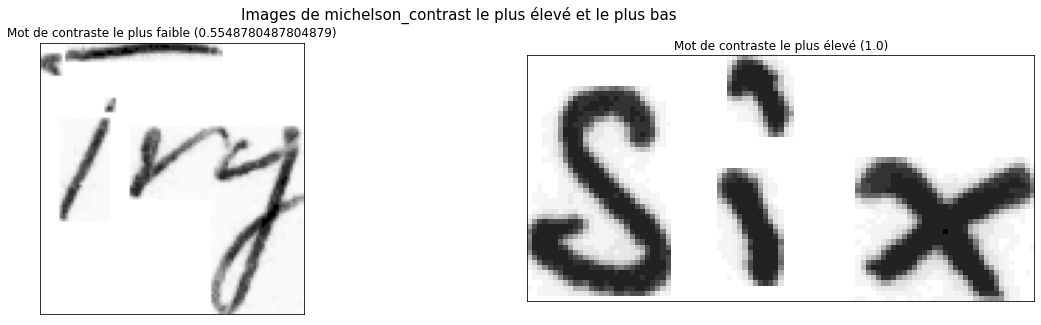

In [53]:
fig = plt.figure(figsize=(20,5))

ax1 = fig.add_subplot(121)
ind_min = df.michelson_contrast.sort_values(ascending=True).index[0]
ax1.set_title('Mot de contraste le plus faible (' +str(df.iloc[ind_min].michelson_contrast) + ')')
show_word_image_by_line_ax(df.iloc[ind_min], ax1)

ax2 = fig.add_subplot(122)
ind_max = df.michelson_contrast.sort_values(ascending=False).index[0]
ax2.set_title('Mot de contraste le plus élevé (' +str(df.iloc[ind_max].michelson_contrast) + ')')
show_word_image_by_line_ax(df.iloc[ind_max], ax2)

fig.suptitle('Images de michelson_contrast le plus élevé et le plus bas', fontsize=15);

L'image au contraste le plus petit reste lisible, nous pouvons ainsi considérer les autres images comme lisibles.

### Analyse du niveau de gris des lignes

<span style="color: red">
Warning : le gray_level du dataset initial correspond au gray_level de la ligne scannée et pas celui du mot.
</span>

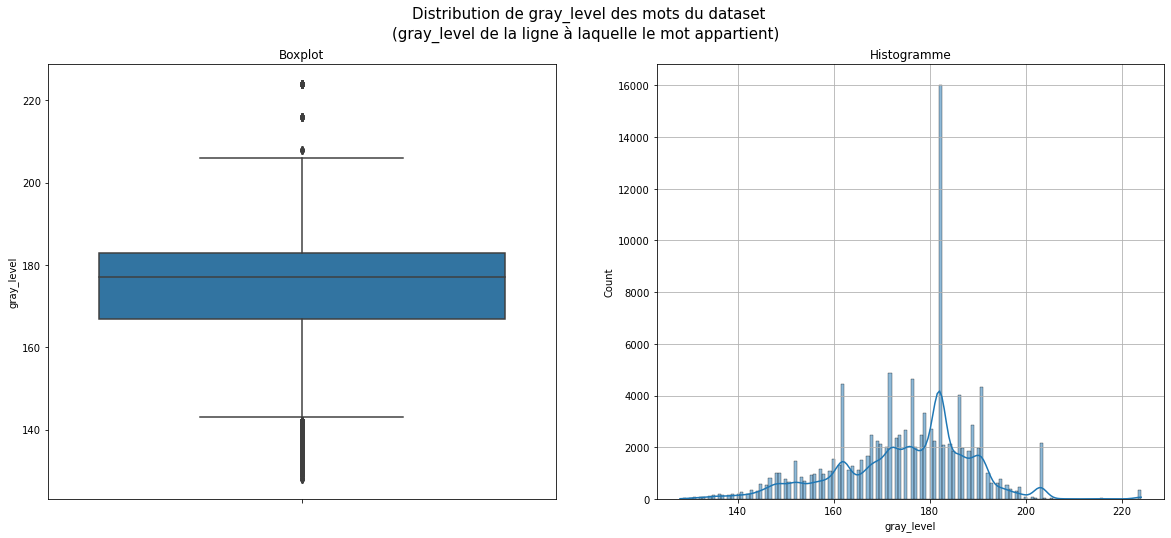

In [54]:
fig = plt.figure(figsize=(20,8))

ax1 = fig.add_subplot(121)
ax1.set_title('Boxplot')
sns.boxplot(y='gray_level', data=df);

ax2 = fig.add_subplot(122)
sns.histplot(data = df, x= 'gray_level', kde = True)
ax2.set_title('Histogramme')
plt.grid()

fig.suptitle('Distribution de gray_level des mots du dataset\n(gray_level de la ligne à laquelle le mot appartient) ', fontsize=15);

Nous remarquons une concentration des niveaux de gris autour de la médiane (177) avec une déviation moyenne standard légère (seulement 13.8). 

Nous pouvons ainsi nous poser la question suivante : comment réagira notre modèle en présence de valeurs extrêmes traits légers aux couleurs claires et traits épaix aux couleurs sombres?

In [55]:
min_gray_level = df['gray_level'].min()
max_gray_level = df['gray_level'].max()

low_gray_level_line_index = df[df['gray_level'] == min_gray_level].index.tolist()[0]
high_gray_level_line_index = df[df['gray_level'] == max_gray_level].index.tolist()[0]

low_gray_form_img_path =  df.iloc[low_gray_level_line_index].form_img_path
low_gray_letter_img_path = df.iloc[low_gray_level_line_index].word_img_path

high_gray_form_img_path = df.iloc[high_gray_level_line_index].form_img_path
high_gray_letter_img_path = df.iloc[high_gray_level_line_index].word_img_path

low_gray_form_img = plt.imread(low_gray_form_img_path)
low_gray_letter_img = plt.imread(low_gray_letter_img_path)

high_gray_form_img = plt.imread(high_gray_form_img_path)
high_gray_letter_img = plt.imread(high_gray_letter_img_path)

In [56]:
df['gray_level'].describe()

count    115186.000000
mean        174.998767
std          13.846222
min         128.000000
25%         167.000000
50%         177.000000
75%         183.000000
max         224.000000
Name: gray_level, dtype: float64

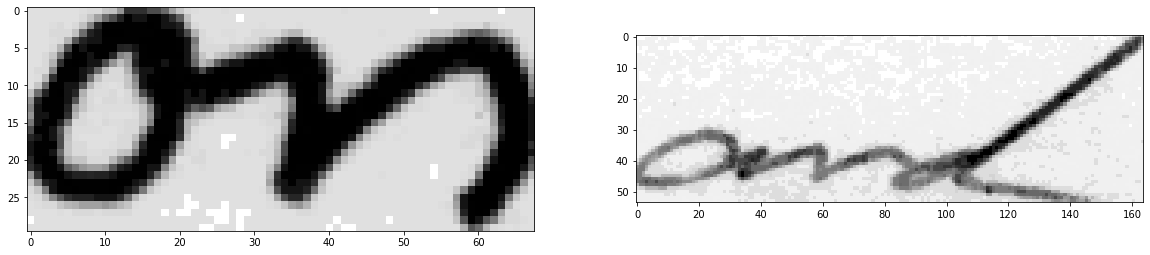

In [57]:
fig,ax = plt.subplots(1, 2, figsize = (20,10))

ax = ax.ravel()
ax[0].imshow(low_gray_letter_img, cmap='gray')
ax[1].imshow(high_gray_letter_img, cmap='gray')
plt.show()

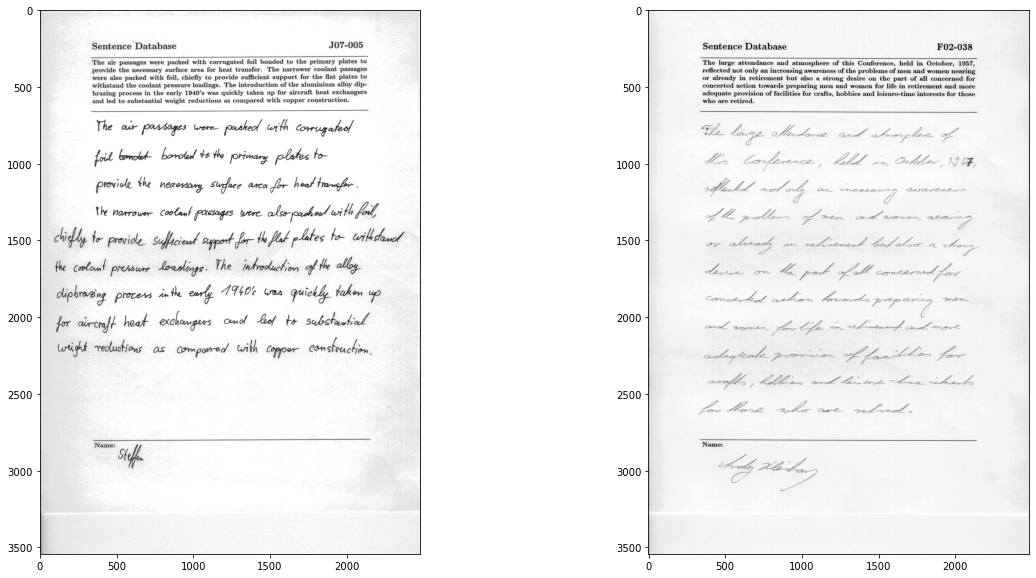

In [58]:
fig,ax = plt.subplots(1, 2, figsize = (20,10))
ax[0].imshow(low_gray_form_img, cmap='gray')
ax[1].imshow(high_gray_form_img, cmap='gray')
plt.show()

Les images du dataset sont toutes réalisées dans de bonnes conditions pour ce qui est du contraste entre le texte et le fond. Il n'y a pas de reliefs, de couleurs ou de motifs pouvant rendre l'extraction de texte difficile.

#### Affichage global

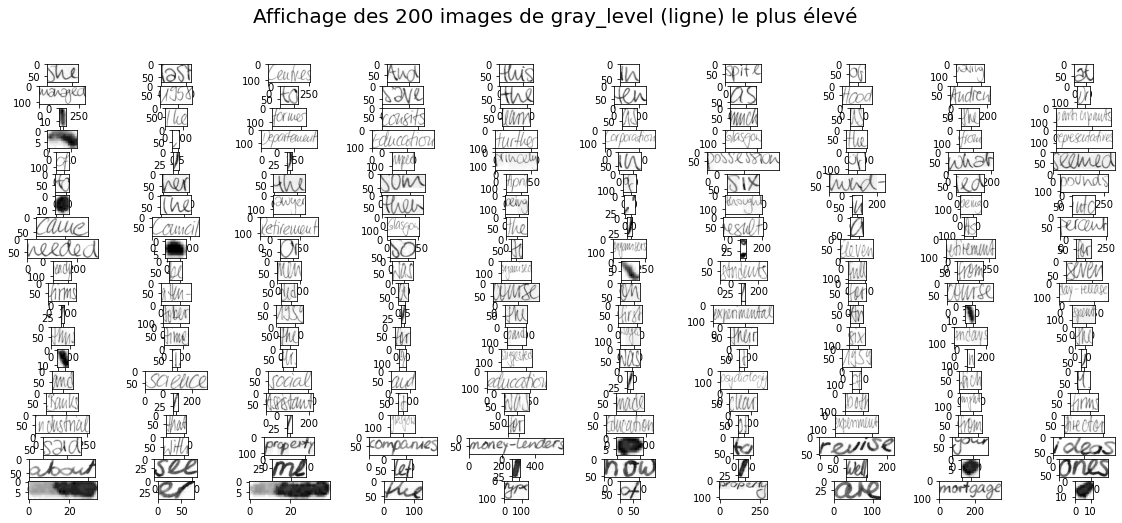

In [59]:
n_lignes = 20
n_colonnes = 10
n_images = n_lignes * n_colonnes

df_temp = df[df.seg_res==1].sort_values(by='gray_level', ascending = False, ignore_index=True)

fig = plt.figure(figsize = (20,8))

for i in range(n_images):
    fig.add_subplot(n_lignes,n_colonnes,i+1)
    plt.imshow(plt.imread(get_word_image_path_by_word_id(df_temp.word_id.iloc[i])), cmap = 'gray')
    
fig.suptitle(t = 'Affichage des ' + str(n_images) + ' images de gray_level (ligne) le plus élevé', fontsize = 20);

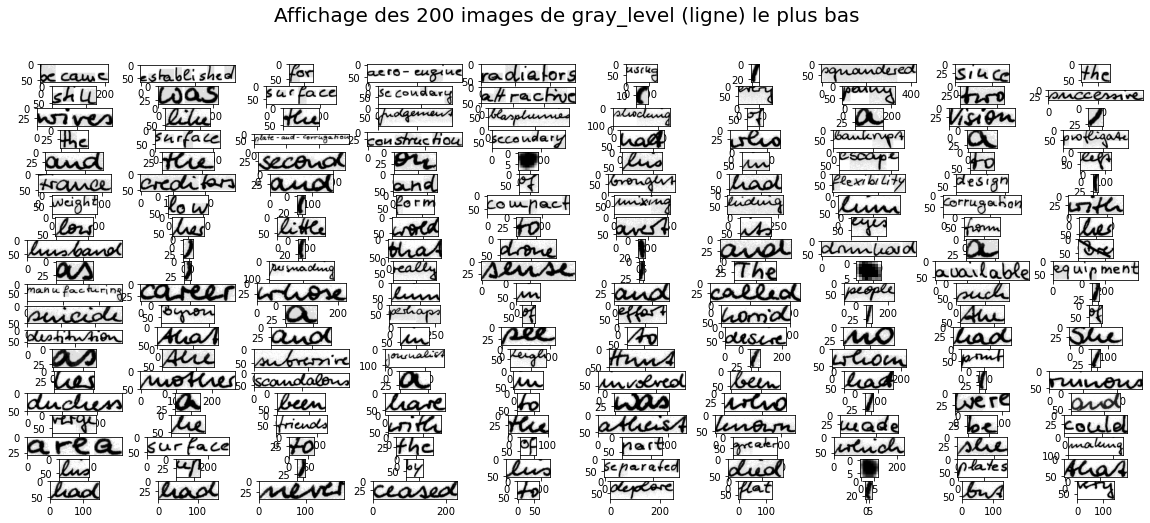

In [60]:
n_lignes = 20
n_colonnes = 10
n_images = n_lignes * n_colonnes

df_temp = df[df.seg_res==1].sort_values(by='gray_level', ascending = True, ignore_index=True)

fig = plt.figure(figsize = (20,8))

for i in range(n_images):
    fig.add_subplot(n_lignes,n_colonnes,i+1)
    plt.imshow(plt.imread(get_word_image_path_by_word_id(df_temp.word_id.iloc[i])), cmap = 'gray')
    
fig.suptitle(t = 'Affichage des ' + str(n_images) + ' images de gray_level (ligne) le plus bas', fontsize = 20);

### Analyse du niveau de gris des mots

In [61]:
%%time

def get_img_mean(id):
    image = plt.imread(get_word_image_path_by_word_id(id))
    return image.mean()

df['gray_level_mot'] = df.word_id.apply(get_img_mean)

CPU times: user 30.4 s, sys: 3.34 s, total: 33.7 s
Wall time: 42.6 s


In [107]:
df['gray_level_mot'].describe()

count    115186.000000
mean          0.828793
std           0.092918
min           0.267787
25%           0.803556
50%           0.853183
75%           0.887028
max           0.994348
Name: gray_level_mot, dtype: float64

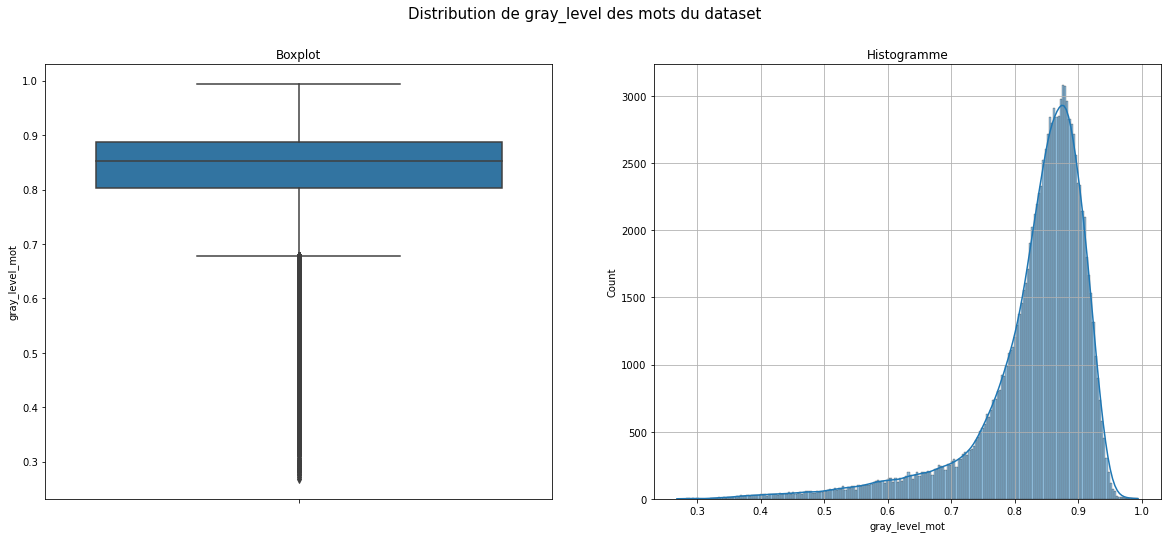

In [62]:
fig = plt.figure(figsize=(20,8))

ax1 = fig.add_subplot(121)
ax1.set_title('Boxplot')
sns.boxplot(y='gray_level_mot', data=df);

ax2 = fig.add_subplot(122)
sns.histplot(data = df, x= 'gray_level_mot', kde = True)
ax2.set_title('Histogramme')
plt.grid()

fig.suptitle('Distribution de gray_level des mots du dataset', fontsize=15);

#### Représentation globale

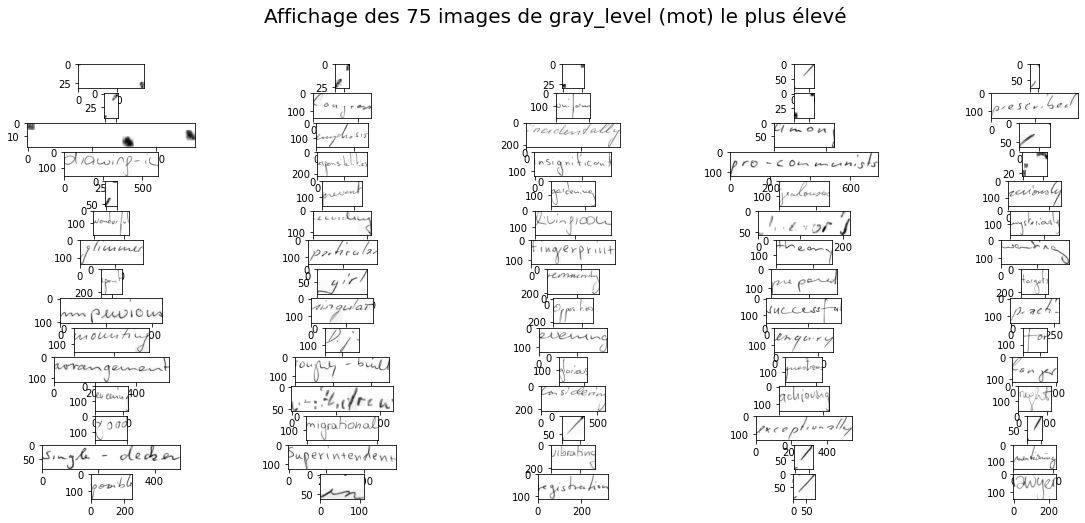

In [63]:
n_lignes = 15
n_colonnes = 5
n_images = n_lignes * n_colonnes

df_temp = df[df['seg_res']==1].sort_values(by='gray_level_mot', ascending = False, ignore_index=True)

fig = plt.figure(figsize = (20,8))

for i in range(n_images):
    fig.add_subplot(n_lignes,n_colonnes,i+1)
    plt.imshow(plt.imread(get_word_image_path_by_word_id(df_temp.word_id.iloc[i])), cmap = 'gray')
    
fig.suptitle(t = 'Affichage des ' + str(n_images) + ' images de gray_level (mot) le plus élevé', fontsize = 20);

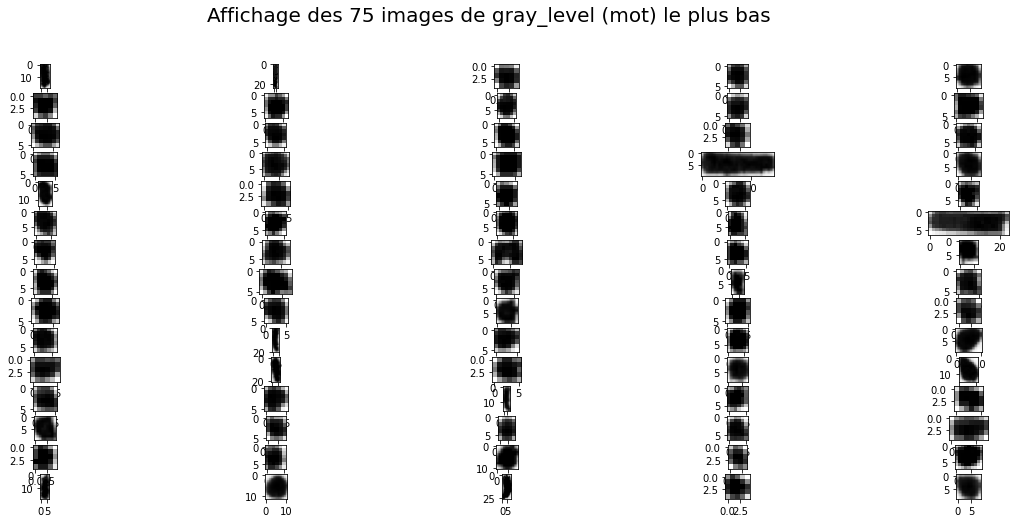

In [64]:
n_lignes = 15
n_colonnes = 5
n_images = n_lignes * n_colonnes

df_temp = df[(df['seg_res']==1) & (df['gray_level_mot']>0)].sort_values(by='gray_level_mot', ascending = True, ignore_index=True)

fig = plt.figure(figsize = (20,8))

for i in range(n_images):
    fig.add_subplot(n_lignes,n_colonnes,i+1)
    plt.imshow(plt.imread(get_word_image_path_by_word_id(df_temp.word_id.iloc[i])), cmap = 'gray')
    
fig.suptitle(t = 'Affichage des ' + str(n_images) + ' images de gray_level (mot) le plus bas', fontsize = 20);

In [65]:
### Mise en relation du niveau de gris d'une ligne et d'un mot

In [66]:
#from scipy.stats import pearsonr

#pearsonr(df.gray_level, df.gray_level_mot)

In [67]:
#plt.figure(figsize = (15,8))
#sns.scatterplot(data=df[df['seg_res']==1], x='gray_level', y='gray_level_mot')
#plt.title('Relation entre gray_level mot et gray_level ligne')
#plt.grid()

### Bilan dataframe des mots 'df' après deuxième nettoyage

In [68]:
print('Le dataset dispose de ' + str(df.shape[0]) +' mots scannés.')
print('Le dataset dispose de ' + str(df['seg_res'].value_counts()[1]) +' mots avec segmentation OK.')

Le dataset dispose de 115186 mots scannés.
Le dataset dispose de 96420 mots avec segmentation OK.


### Analyse de la répartition des mots dans le corpus

In [69]:
### ajouter le form_id et le writer_id à df
df['form_id'] = df.word_id.apply(lambda x: '-'.join(x.split(sep='-')[:2]))
df = df.merge(right = form_df[['form_id','writer_id']], how='inner', on='form_id')

In [70]:
df_temp = pd.DataFrame(df.groupby(['transcription'])['writer_id'].value_counts())
df_temp = df_temp.rename({'writer_id':'count'},axis=1).reset_index()

CPU times: user 5.11 s, sys: 806 ms, total: 5.92 s
Wall time: 5.73 s


Text(0.5, 1.0, 'Croisement entre mots et rédacteurs')

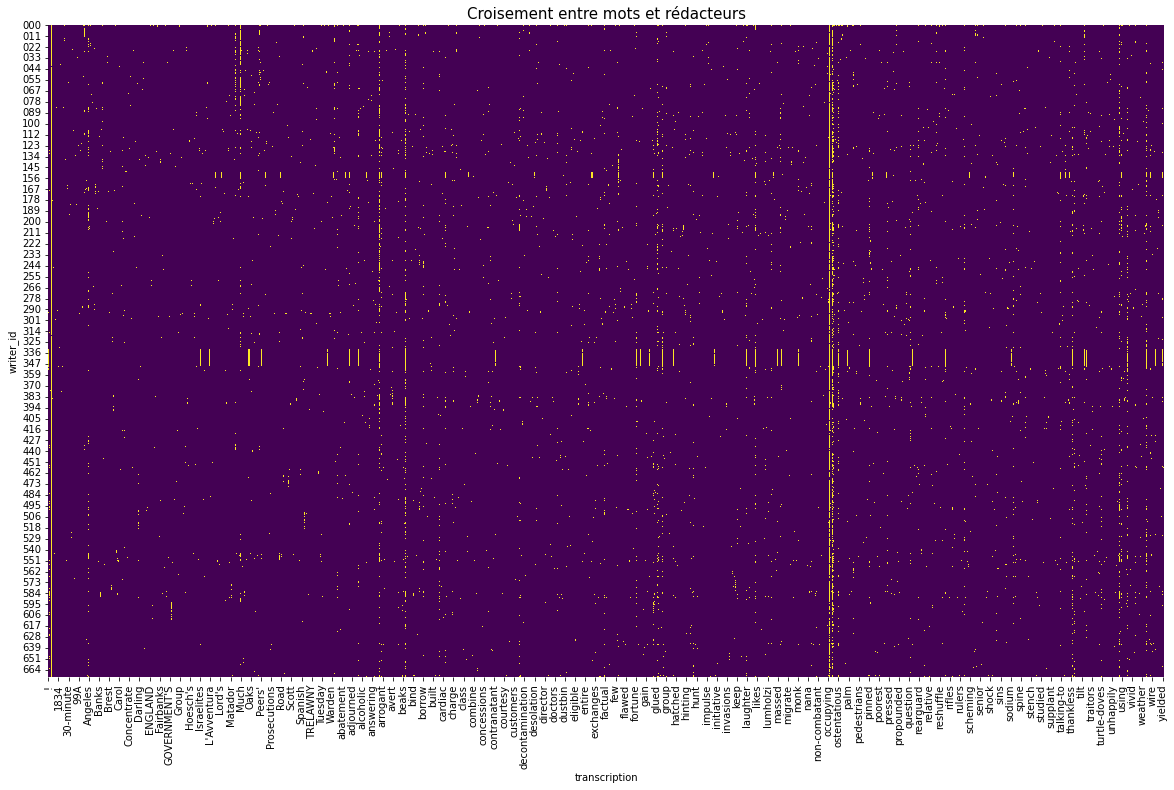

In [71]:
%%time
matrice2 = pd.crosstab(df_temp['writer_id'], df_temp['transcription'])                                
                                
fig = plt.figure(figsize = (20,12))
sns.heatmap(matrice2, cmap = 'viridis',cbar = False)
plt.title('Croisement entre mots et rédacteurs', fontsize=15);

### Analyse de la répartition des lettres dans le corpus

In [72]:
corpus = "".join([trans for trans in df['transcription']])

def get_letter_frequency_dict(text):
    dic = {}
    for l in text:
        if l in dic:
            dic[l] += 1
        else:
            dic[l] = 1
    return dic

freq_dict = get_letter_frequency_dict(corpus)
print(freq_dict)


{'A': 1257, 'M': 1144, 'O': 469, 'V': 171, 'E': 675, 't': 39964, 'o': 33336, 's': 27866, 'p': 8253, 'r': 27513, '.': 6179, 'G': 661, 'a': 35841, 'i': 30299, 'k': 2819, 'e': 56903, 'l': 18033, 'f': 10004, 'm': 10640, 'n': 31025, 'g': 8653, 'y': 8262, 'L': 638, 'b': 6800, 'u': 12202, 'P': 720, 'd': 17949, ' ': 49, 'w': 8807, 'c': 11823, 'h': 25242, 'F': 489, 'j': 423, 'W': 728, ',': 5614, 'x': 785, '0': 431, 'T': 1652, '-': 1545, "'": 1974, 'v': 4528, 'B': 854, 'H': 988, '"': 1596, 'S': 1064, '1': 493, '9': 179, '5': 157, '8': 118, '3': 174, '#': 79, 'q': 370, 'N': 711, 'R': 606, 'D': 569, 'K': 163, 'U': 189, 'I': 1598, '(': 202, '2': 209, ')': 199, 'C': 750, '4': 118, ':': 164, 'Y': 227, 'J': 181, '7': 64, ';': 204, '6': 121, 'z': 205, 'Z': 10, '?': 259, '*': 14, 'Q': 16, 'X': 8, '!': 225, '/': 16, '&': 55, '+': 9}


In [73]:
keys = list(freq_dict.keys())
values = list(freq_dict.values())
sorted_indexes = np.argsort(keys)
labels = []
counts = []
for index in sorted_indexes:
    labels.append(keys[index])
    counts.append(values[index])

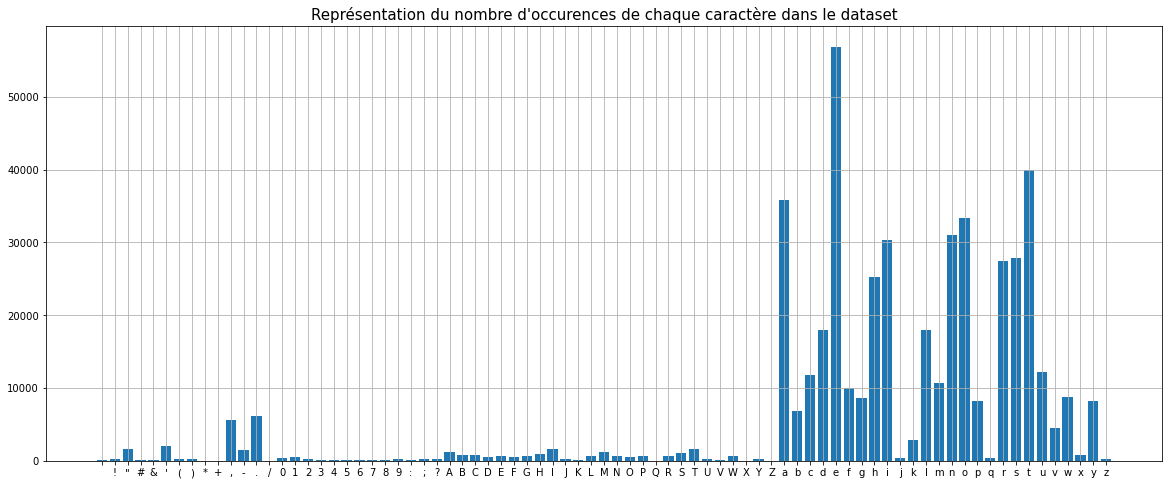

In [74]:
plt.figure(figsize=(20,8))
plt.title("Représentation du nombre d'occurences de chaque caractère dans le dataset", fontsize=15)
plt.bar(labels, counts)
plt.grid()
plt.show()

In [75]:
print("La lettre 'k' est représentée seulement", freq_dict['k'], "dans le corpus")
print("Tandis que la lettre 'e' est représentée", freq_dict['e'], "dans le corpus")

La lettre 'k' est représentée seulement 2819 dans le corpus
Tandis que la lettre 'e' est représentée 56903 dans le corpus


Nous pouvons observer une grosse disparité dans les représentations de chacune des lettres.
Les lettres 'j', 'k', 'q', 'x' et 'z' notamment sont très peu représentées. 

A l'inverse, les lettres 'e', 'a' et 't' sont très présentes. 



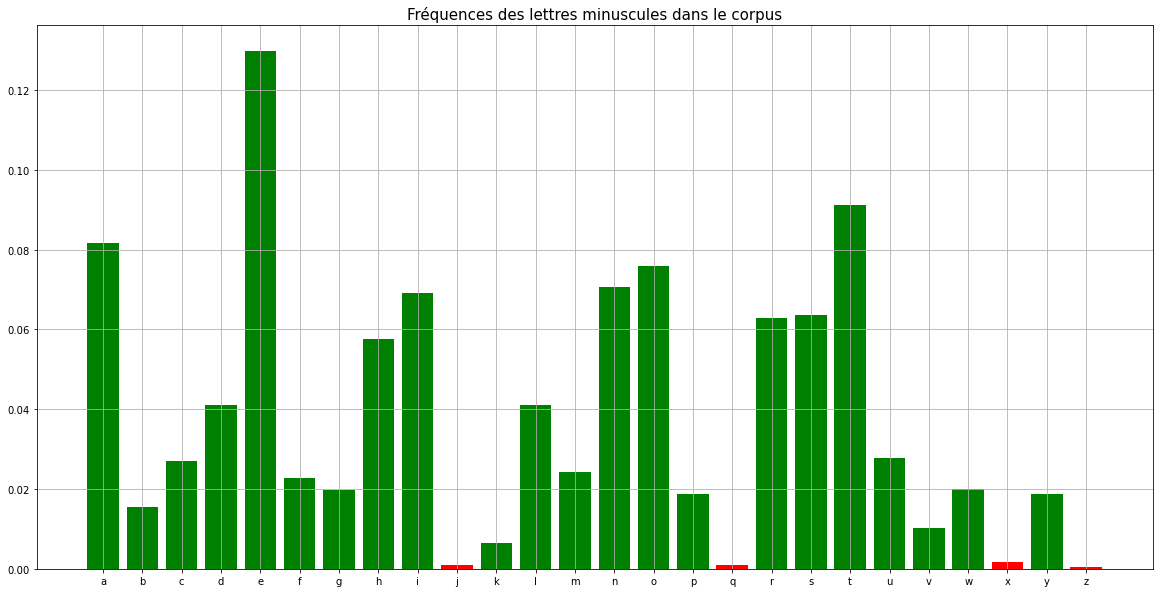

In [76]:
from functools import reduce

alphabet_start = labels.index('a')

alphabet_labels = labels[alphabet_start:]
alphabet_counts = counts[alphabet_start:]
total_alphabet_occurences = reduce(lambda a, b: a + b,  alphabet_counts)
colors = [('green' if p > 1000 else 'red') for p in alphabet_counts]

plt.figure(figsize=(20,10))
plt.title("Fréquences des lettres minuscules dans le corpus", fontsize=15)
plt.bar(alphabet_labels, [count / total_alphabet_occurences for count in alphabet_counts], color=colors)
plt.grid()
plt.show()

Cette distribution peut être mise en paralèlle avec la distribution des lettres dans la langue anglaise. 

En effet, notre objectif étant de créer une reconnaissance de caractères, plus notre modèle aura l'habtiude de traiter des lettres fréquentes correctement, meilleures seront nos chances de réussite, à defaut d'avoir un dataset plus conséquent.

Or, les fréquences des lettres anglaises semblent bien concordées avec la distribution de notre corpus. Le corpus est donc bien représentatif.

<img src="../images/english_letter_distribution.png" />

Source: https://www3.nd.edu/~busiforc/handouts/cryptography/letterfrequencies.html

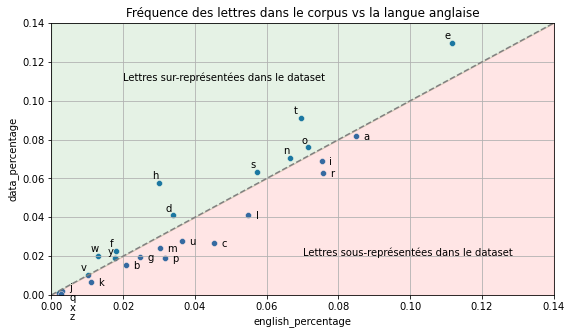

In [77]:
df_alphabet = pd.DataFrame(list(zip(alphabet_labels,alphabet_counts)), columns = ['label','data_count'])
df_alphabet['data_percentage'] = df_alphabet['data_count'] / df_alphabet['data_count'].sum()

english_labels = ['E','A','R','I','O','T','N','S','L','C','U','D','P','M','H','G','B','F','Y','W','K','V','X','Z','J','Q']
english_counts= [0.111607,0.084966,0.075809,0.075448,0.071635,0.069509,0.066544,0.057351,0.054893,0.045388,0.036308,0.033844,0.031671,0.030129,0.030034,0.024705,0.02072,0.018121,0.017779,0.012899,0.011016,0.010074,0.002902,0.002722,0.001965,0.001962]

df_alphabet_english = pd.DataFrame(list(zip(english_labels,english_counts)), columns =['label', 'english_percentage'])
df_alphabet_english.label = df_alphabet_english.label.apply(lambda x: x.lower())

df_alphabet = df_alphabet.merge(right = df_alphabet_english, on='label')


plt.figure(figsize = (9,5))
sns.scatterplot(data=df_alphabet, x='english_percentage', y='data_percentage')
plt.title('Fréquence des lettres dans le corpus vs la langue anglaise')
plt.plot([0,.14],[0,.14], ls='--', color='gray')
plt.xlim(0,.14)
plt.ylim(0,.14)
plt.grid()

j=0

for i in range(len(df_alphabet)):
    if df_alphabet.data_percentage.iloc[i] < .005:
        plt.text(x = .005, y=.002 - j * .005,s = df_alphabet.label.iloc[i])
        j+=1
    elif df_alphabet.data_percentage.iloc[i] >= df_alphabet.english_percentage.iloc[i]:
        plt.text(x = (df_alphabet.english_percentage.iloc[i] - .002), y=(df_alphabet.data_percentage.iloc[i] + .002), s = df_alphabet.label.iloc[i])
    else :
        plt.text(x = (df_alphabet.english_percentage.iloc[i] + .002), y=(df_alphabet.data_percentage.iloc[i] - .002), s = df_alphabet.label.iloc[i])


plt.fill_between(x=[0,.14], y1=[0,0], y2=[0,.14],alpha = .1, color='red')
plt.fill_between(x=[0,.14], y1=[0,.14], y2=[.14,.14],alpha = .1, color='green')

plt.text(x=.07, y=.02,s='Lettres sous-représentées dans le dataset');
plt.text(x=.02,y=.11,s='Lettres sur-représentées dans le dataset');

On peut par contre se demander comment réagirait notre modèle à une autre langue dont la répartition des lettres serait différente.

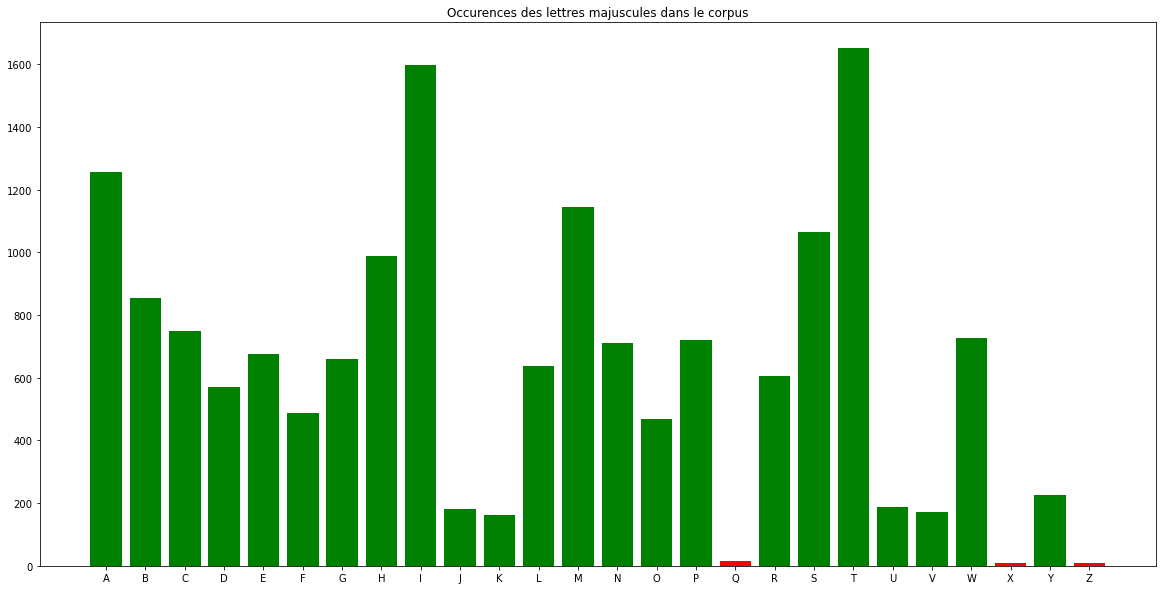

In [78]:
from functools import reduce

alphabet_start = labels.index('A')
alphabet_end = labels.index('Z')

alphabet_labels = labels[alphabet_start:alphabet_end++1]
alphabet_counts = counts[alphabet_start:alphabet_end+1]
total_alphabet_occurences = reduce(lambda a, b: a + b,  alphabet_counts)
colors = [('green' if p > 100 else 'red') for p in alphabet_counts]

plt.figure(figsize=(20,10))
plt.title("Occurences des lettres majuscules dans le corpus")
plt.bar(alphabet_labels, [count for count in alphabet_counts], color=colors)
plt.show()

On remarque cependant une sous représentation des majuscules dans le dataset. Les représentations des majuscules étant radicalement différentes des minuscules, il se peut que notre modèle manque de données d'entraînement pour, par la suite, bien distinguer des majuscules.

### Longueur des mots

In [79]:
total_word_length = 0
number_words = 0
biggest_word_length = 0
biggest_word = None
all_words = []
for text in df['transcription']:
    words = text.split(' ')
    for word in words:
        all_words.append(word)
        l = len(word)
        if l > biggest_word_length:
            biggest_word_length = l
            biggest_word = word
        total_word_length += l
    number_words += len(words) 

print("Le mot le plus long est", biggest_word, "avec", biggest_word_length, "caractères")


Le mot le plus long est ----------------------------------------------------- avec 53 caractères


## Position et taille des boîtes

```
file n06-128.png
```

Output:
`n06-128.png: PNG image data, 2479 x 3542, 8-bit grayscale, non-interlaced`


### Position des boîtes

In [80]:
df[(df['x'] == -1) | (df['y'] == -1) | (df['h'] == -1) | (df['w'] == -1)].head()

Empty DataFrame
Columns: [index, word_id, seg_res, gray_level, x, y, w, h, tag, transcription, word_img_path, form_img_path, michelson_contrast, gray_level_mot, form_id, writer_id]
Index: []

Il ne reste plus de mots dont le positionnement n'a pas été trouver. Nous pouvons donc analyser la répartition des boîtes dans notre dataset.

In [81]:
print(df['x'].max())
print(df['y'].max())

2471
2792


In [82]:
def show_text_position_over_dataset():
    arr = np.zeros((3542, 2479))
    for index, row in df.iterrows():
        x = row.x
        y = row.y
        arr[y][x] += 1
        for i in range(row.h):
            for j in range(row.w):
                arr[y + i][x + j] += 1

    plt.figure(figsize=(20,10))
    plt.imshow(arr);

# Need ten minutes to run
#show_text_position_over_dataset()

<img src="../images/text_box_position.png">

### Taille des boîtes

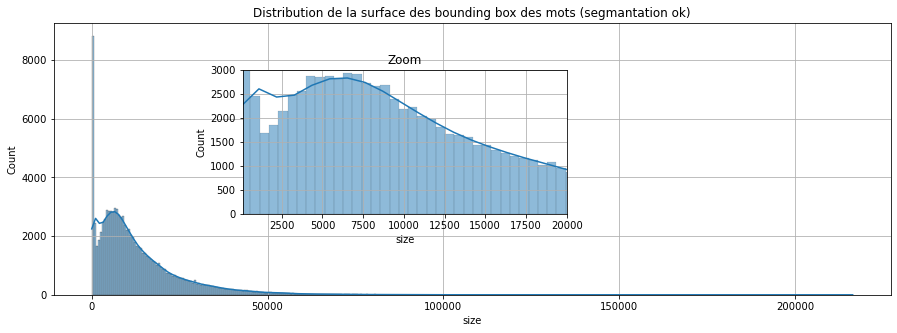

In [83]:
df['size'] = df.h * df.w

plt.figure(figsize = (15,5))
sns.histplot(data = df[df.seg_res==1], x= 'size', kde = True)
plt.title('Distribution de la surface des bounding box des mots (segmantation ok)')
plt.grid()

a = plt.axes([.3, .35, .3, .4])
sns.histplot(data = df[df.seg_res==1], x= 'size', kde = True)
plt.title('Zoom')
plt.xlim((100,20000))
plt.ylim((0,3000))
plt.grid();

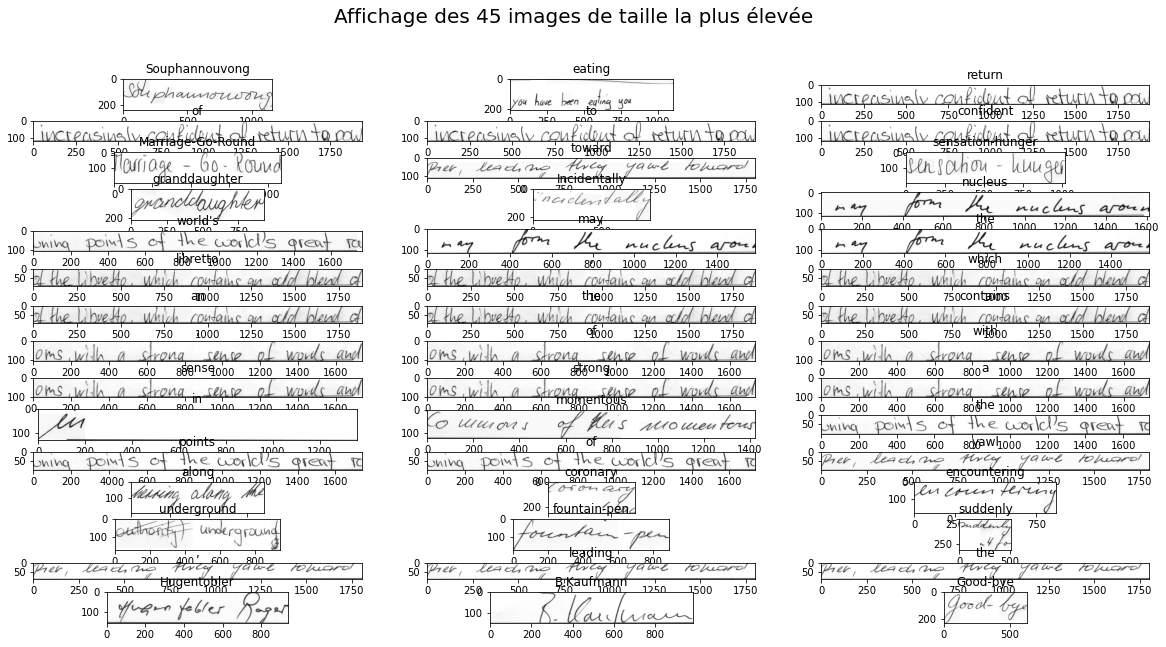

In [108]:
df['size'] = df.h * df.w

n_lignes = 15
n_colonnes = 3
n_images = n_lignes * n_colonnes

df_temp = df.sort_values(by='size', ascending = False, ignore_index=True)

fig = plt.figure(figsize = (20,10))

for i in range(n_images):
    fig.add_subplot(n_lignes,n_colonnes,i+1)
    plt.title(df_temp.transcription.iloc[i])
    plt.imshow(plt.imread(get_word_image_path_by_word_id(df_temp.word_id.iloc[i])), cmap = 'gray')
    
fig.suptitle(t = 'Affichage des ' + str(n_images) + ' images de taille la plus élevée', fontsize = 20);

Ce résultat montre qu'il y a des mots mal segmentés. Besoin de trier uniquement sur les mots avec seg_res == 1.

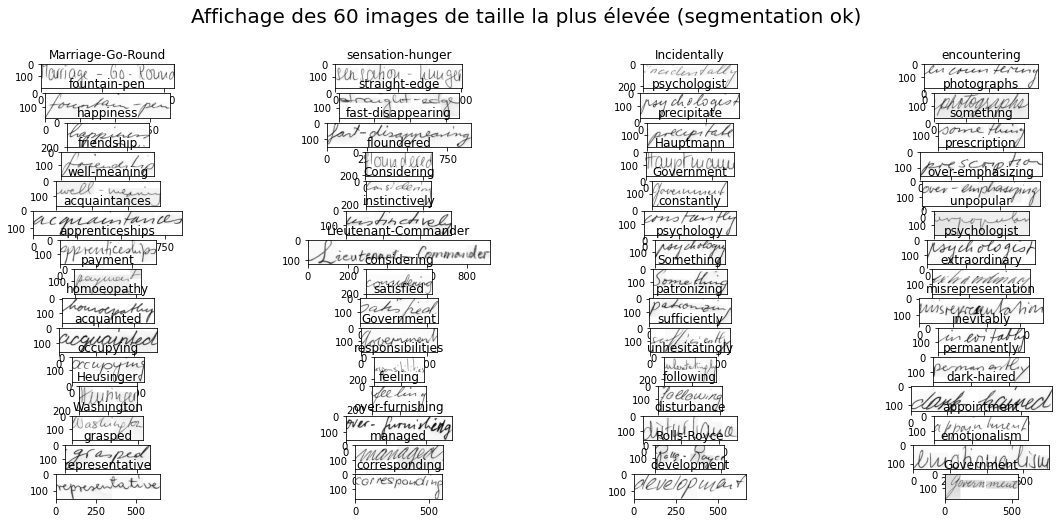

In [109]:
df['size'] = df.h * df.w

n_lignes = 15
n_colonnes = 4
n_images = n_lignes * n_colonnes

df_temp = df[df['seg_res']==1].sort_values(by='size', ascending = False, ignore_index=True)

fig = plt.figure(figsize = (20,8))

for i in range(n_images):
    fig.add_subplot(n_lignes,n_colonnes,i+1)
    plt.title(df_temp.transcription.iloc[i])
    plt.imshow(plt.imread(get_word_image_path_by_word_id(df_temp.word_id.iloc[i])), cmap = 'gray')
    
fig.suptitle(t = 'Affichage des ' + str(n_images) + ' images de taille la plus élevée (segmentation ok)', fontsize = 20);

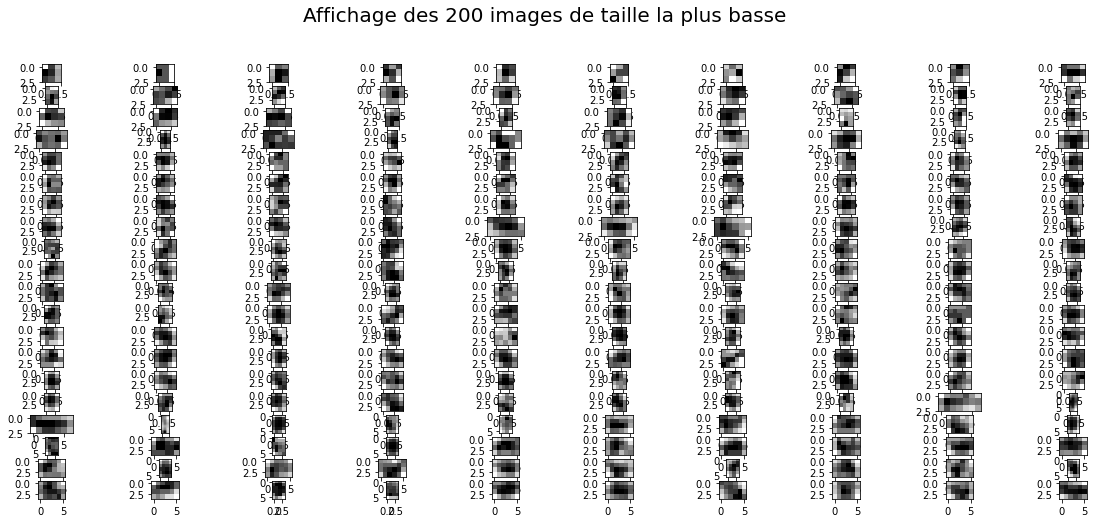

In [86]:
df['size'] = df.h * df.w

n_lignes = 20
n_colonnes = 10
n_images = n_lignes * n_colonnes

df_temp = df.sort_values(by='size', ascending = True, ignore_index=True)

fig = plt.figure(figsize = (20,8))

for i in range(n_images):
    fig.add_subplot(n_lignes,n_colonnes,i+1)
    plt.imshow(plt.imread(get_word_image_path_by_word_id(df_temp.word_id.iloc[i])), cmap = 'gray')
    
fig.suptitle(t = 'Affichage des ' + str(n_images) + ' images de taille la plus basse', fontsize = 20);

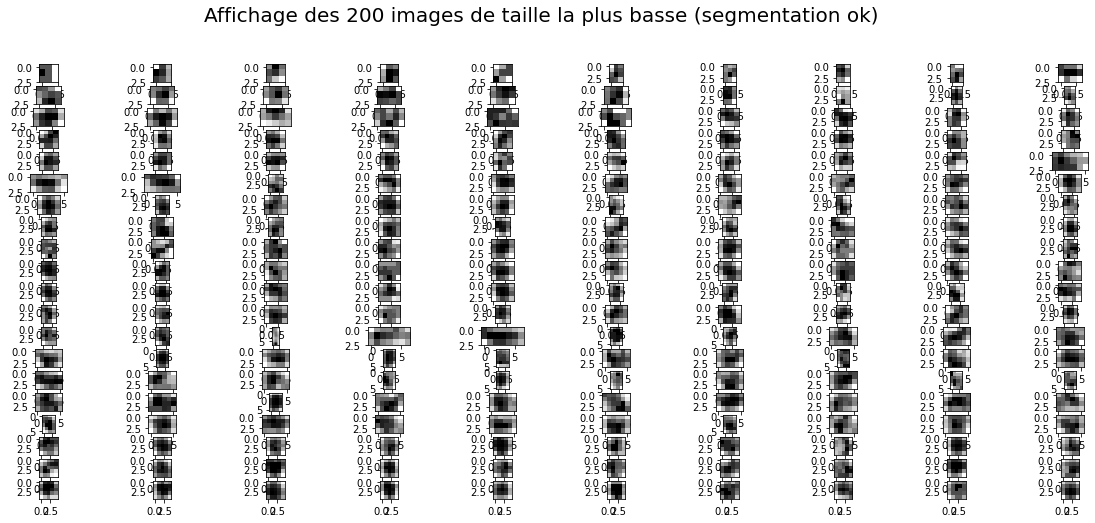

In [87]:
df['size'] = df.h * df.w

n_lignes = 20
n_colonnes = 10
n_images = n_lignes * n_colonnes

df_temp = df[df['seg_res']==1].sort_values(by='size', ascending = True, ignore_index=True)

fig = plt.figure(figsize = (20,8))

for i in range(n_images):
    fig.add_subplot(n_lignes,n_colonnes,i+1)
    plt.imshow(plt.imread(get_word_image_path_by_word_id(df_temp.word_id.iloc[i])), cmap = 'gray')
    
fig.suptitle(t = 'Affichage des ' + str(n_images) + ' images de taille la plus basse (segmentation ok)', fontsize = 20);

## Styles d'écriture

Nous pouvons également nous intéresser aux différents styles d'écriture pouvant influencés la représentation d'une lettre. 

Nous pouvons supposer que chacun des rédacteurs a un style d'écriture qui lui est propre et nous intéresser aux nombres de styles existants pour chacune des lettres. 

Il serait par ailleurs peut être intéressant par la suite de générer des textes ayant différentes polices d'écriture pour diversifier davantage les représentations possibles d'une lettre.

In [88]:
#Analyse des fichiers xml sur les forms

#Récupérer tous les mots d'un form
def get_words_from_xml_form(filepath):
    words = []
    tree = etree.parse(filepath)
    for word in tree.xpath("/form/handwritten-part/line/word"):
        words.append(word.get('text'))
    return words

In [89]:
# parcours de tous les fichiers d'un dossier et ses sous-dossiers, possibilité de spécifier une extension et la recherche parmis les sous dossiers
def get_files(path, ext='', sub=False):
    if sub == True:
        path = path + '/**'     
    if ext != '':
        path = path + '/*.' + ext
    else:
        path = path + '/*.*'  # le . filtre les dossiers  
    files = glob.glob(path, recursive=sub)
    return files

La répartition du nombre de formulaires écrits par rédacteur n'est pas uniforme, il faudra donc être prudent lors de la création des ensembles de training, validation et test (ne prendre qu'un seul formulaire par rédacteur pour chaque ensemble par ex)

## Analyse de la distributions des mots et caractères par rédacteur
(titre à confirmer)

In [90]:
#Chargement des informations depuis les fichiers xml (un xml par form)
all_files = get_files(xml_files_path, ext='xml', sub=True)
all_words = []
for file in all_files:
    all_words.extend(get_words_from_xml_form(file))
all_letters = []
for word in all_words:
    all_letters.extend(list(word))
all_letters.sort()    

print('Nombre de forms chargés : ',len(all_files))
print('Nombre de mots chargés : ', len(all_words))
print('Nombre de lettres chargées : ', len(all_letters))


Nombre de forms chargés :  1539
Nombre de mots chargés :  115320
Nombre de lettres chargées :  475702


In [91]:
# creation d'un dataframe wavec tous les mots et leur longueur
df_words = pd.DataFrame(all_words, columns=['words'])
df_words['len'] = df_words['words'].apply(lambda w: len(w))

print('Mot pourri : ', df_words['words'][df_words['len'] == 53])
#suppression du "faux" mot pour meilleure visu
df_words2 = df_words.drop(index=107040)


Mot pourri :  82300    ----------------------------------------------...
Name: words, dtype: object


Nombre de mots différents :  13550
Nombre de mots vues une seule fois :  7190
Nombre de mots vues 1000+ fois :  11


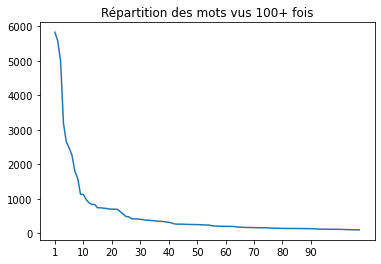

In [92]:
#Répartition des mots

df_words_count = pd.DataFrame(Counter(df_words2['words']).keys(), columns=['words'])
df_words_count['count'] = Counter(df_words2['words']).values()
df_words_count.sort_values(by='count', inplace=True, ascending=False)

print('Nombre de mots différents : ', len(df_words2['words'].unique()));
print('Nombre de mots vues une seule fois : ', len(df_words_count['count'][df_words_count['count'] == 1]));
print('Nombre de mots vues 1000+ fois : ', len(df_words_count['count'][df_words_count['count'] >= 1000]));

# df_words_count.head(20)
# ax = plt.gca()
# ax.axes.xaxis.set_visible(False)

plt.plot(df_words_count['words'][df_words_count['count'] > 100], df_words_count['count'][df_words_count['count'] > 100])
plt.xticks(np.arange(0, 100, 10), ['1', '10', '20', '30', '40', '50', '60', '70', '80', '90'])
plt.title('Répartition des mots vus 100+ fois');



Beaucoup de mots ne sont vus qu'une seule fois, d'autres sont vus de très nombreuses fois, attention à l'overfitting

Nombre total de lettres :  475700
Nombre moyen de lettres par mot:  4.125079128330977


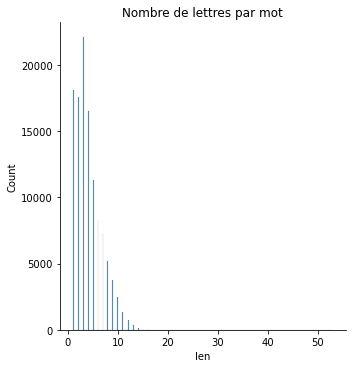

In [93]:
# Nombre de lettres par mot
sns.displot(df_words2['len'], kind = 'hist')
plt.title('Nombre de lettres par mot');

print('Nombre total de lettres : ', df_words2['len'].sum())
print('Nombre moyen de lettres par mot: ', df_words2['len'].mean())

In [94]:
df['form_id'] = df['word_id'].apply(lambda x: '-'.join(x.split('-')[:2]))
df.head()

index         word_id  seg_res  gray_level     x    y    w   h  tag  \
0      0  a01-000u-00-00        1         154   408  768   27  51   AT   
1      1  a01-000u-00-01        1         154   507  766  213  48   NN   
2      2  a01-000u-00-02        1         154   796  764   70  50   TO   
3      3  a01-000u-00-03        1         154   919  757  166  78   VB   
4      4  a01-000u-00-04        1         154  1185  754  126  61  NPT   

  transcription                                  word_img_path  \
0             A  ../data/words/a01/a01-000u/a01-000u-00-00.png   
1          MOVE  ../data/words/a01/a01-000u/a01-000u-00-01.png   
2            to  ../data/words/a01/a01-000u/a01-000u-00-02.png   
3          stop  ../data/words/a01/a01-000u/a01-000u-00-03.png   
4           Mr.  ../data/words/a01/a01-000u/a01-000u-00-04.png   

                   form_img_path  michelson_contrast  gray_level_mot  \
0  ../data/formsA-D/a01-000u.png            0.805755        0.530155   
1  ../data/formsA-D/a01-000u.png            0.808511        0.735608   
2  ../data/formsA-D/a01-000u.png            0.814947        0.713311   
3  ../data/formsA-D/a01-000u.png            0.847826        0.825912   
4  ../data/formsA-D/a01-000u.png            0.875000        0.789901   

    form_id writer_id   size  
0  a01-000u       000   1377  
1  a01-000u       000  10224  
2  a01-000u       000   3500  
3  a01-000u       000  12948  
4  a01-000u       000   7686

In [95]:
df = pd.merge(left=df, right=form_df, on='form_id', how='left')
df.head()

index         word_id  seg_res  gray_level     x    y    w   h  tag  \
0      0  a01-000u-00-00        1         154   408  768   27  51   AT   
1      1  a01-000u-00-01        1         154   507  766  213  48   NN   
2      2  a01-000u-00-02        1         154   796  764   70  50   TO   
3      3  a01-000u-00-03        1         154   919  757  166  78   VB   
4      4  a01-000u-00-04        1         154  1185  754  126  61  NPT   

  transcription  ...   size writer_id_y  text_id  number_of_sentences  \
0             A  ...   1377         000      a01                    2   
1          MOVE  ...  10224         000      a01                    2   
2            to  ...   3500         000      a01                    2   
3          stop  ...  12948         000      a01                    2   
4           Mr.  ...   7686         000      a01                    2   

  word_seg total_lines  correct_lines total_words correct_words  \
0      prt           7              5          52            36   
1      prt           7              5          52            36   
2      prt           7              5          52            36   
3      prt           7              5          52            36   
4      prt           7              5          52            36   

                 form_img_path_y  
0  ../data/formsA-D/a01-000u.png  
1  ../data/formsA-D/a01-000u.png  
2  ../data/formsA-D/a01-000u.png  
3  ../data/formsA-D/a01-000u.png  
4  ../data/formsA-D/a01-000u.png  

[5 rows x 26 columns]

In [96]:
print(df.columns)

Index(['index', 'word_id', 'seg_res', 'gray_level', 'x', 'y', 'w', 'h', 'tag',
       'transcription', 'word_img_path', 'form_img_path_x',
       'michelson_contrast', 'gray_level_mot', 'form_id', 'writer_id_x',
       'size', 'writer_id_y', 'text_id', 'number_of_sentences', 'word_seg',
       'total_lines', 'correct_lines', 'total_words', 'correct_words',
       'form_img_path_y'],
      dtype='object')


In [98]:
letter_writers_dict = {}
for index, row in df.iterrows():
    writer_id = str(row['writer_id_x'])
    for letter in row['transcription']:
        if letter != ' ':
            if letter not in letter_writers_dict:
                letter_writers_dict[letter] = [writer_id]
            else:
                if writer_id not in letter_writers_dict[letter]:
                    letter_writers_dict[letter].append(writer_id)


In [99]:
keys = list(letter_writers_dict.keys())
sorted_indexes = np.argsort(keys)
values = [len(letter_writers_dict[key]) for key in keys]
labels = []
counts = []
for index in sorted_indexes:
    labels.append(keys[index])
    counts.append(values[index])

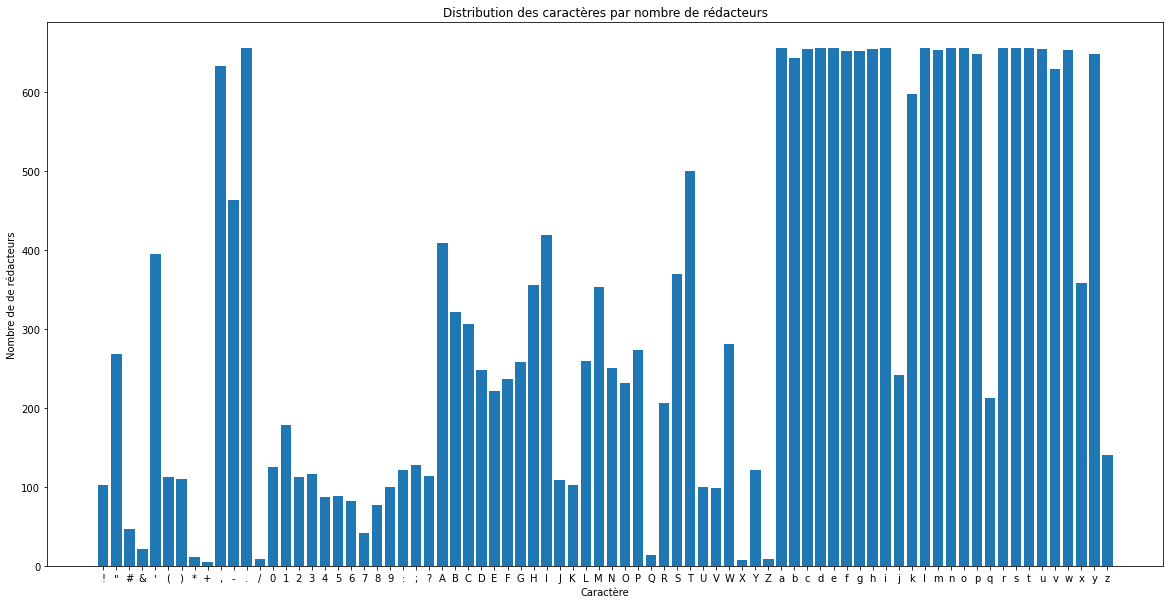

In [100]:
plt.figure(figsize=(20,10))
plt.title("Distribution des caractères par nombre de rédacteurs")
plt.bar(x=labels, height=counts)
plt.xlabel('Caractère')
plt.ylabel("Nombre de de rédacteurs")
plt.show()

Comme on pouvait s'y attendre, les lettres minuscules sont presque toutes au moins une fois représentées par un rédacteur. 

Nous voyons cependant que les lettres majuscules peuvent poser problème car elles ne sont parfois représentées que par moins de 100 rédacteurs différents.

Nous aurions pu également compter le nombre d'occurences de ces lettres pour chaque rédacteur afin de nous assurer qu'un style ne domine pas sur les autres car majoritairement représenté. 

Toutefois, l'impact d'une surreprésentation devrait pouvoir être négligé car les textes comportent tous un bon nombre de lettres différentes.

## Luminance

In [101]:
from PIL import Image

img = Image.open(df.iloc[0].word_img_path)
#Convert the image te RGB if it is a .gif for example
img = img.convert ('RGB')
#coordinates of the pixel
X,Y = 0,0
#Get RGB
pixelRGB = img.getpixel((X,Y))
R,G,B = pixelRGB 

brightness = sum([R,G,B])/3
brightness

249.0

## Détection des contours

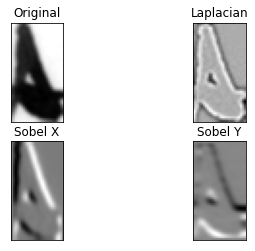

In [102]:
import cv2
import numpy as np
from matplotlib import pyplot as plt



img_arr = cv2.imread(df.iloc[0].word_img_path)
gray = cv2.cvtColor(img_arr, cv2.COLOR_BGR2GRAY)
img = cv2.GaussianBlur(gray,(3,3),0)

laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0, ksize=5)  
sobely = cv2.Sobel(img,cv2.CV_64F,0,1, ksize=5)  


plt.subplot(2,2,1),
plt.imshow(img,cmap = 'gray')
plt.title('Original')
plt.xticks([])
plt.yticks([])

plt.subplot(2,2,2),
plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian')
plt.xticks([])
plt.yticks([])

plt.subplot(2,2,3)
plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X')
plt.xticks([])
plt.yticks([])

plt.subplot(2,2,4)
plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y')
plt.xticks([])
plt.yticks([])

plt.show()

../data/words/a01/a01-030/a01-030-00-08.png


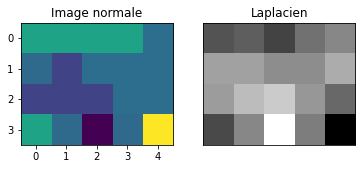

In [103]:
def get_laplacian_img_for_row(row):
    img_arr = cv2.imread(row.word_img_path)
    gray = cv2.cvtColor(img_arr, cv2.COLOR_BGR2GRAY)
    img = cv2.GaussianBlur(gray,(3,3),0)
    return cv2.Laplacian(img,cv2.CV_64F)



bad_contrast_row = df[df['michelson_contrast'] <= 0.2].iloc[0]
laplacian_bad_constrast = get_laplacian_img_for_row(bad_contrast_row)
print(bad_contrast_row.word_img_path)

plt.subplot(1,2,1),
plt.title('Image normale')
plt.imshow(plt.imread(bad_contrast_row.word_img_path));
plt.subplot(1,2,2),
plt.imshow(laplacian_bad_constrast,cmap = 'gray');
plt.title('Laplacien')
plt.xticks([])
plt.yticks([])
plt.show()


In [105]:
first_writer_df = df[df['writer_id_x'] == '000']
print(len(first_writer_df))
print(len(df))

4221
115186


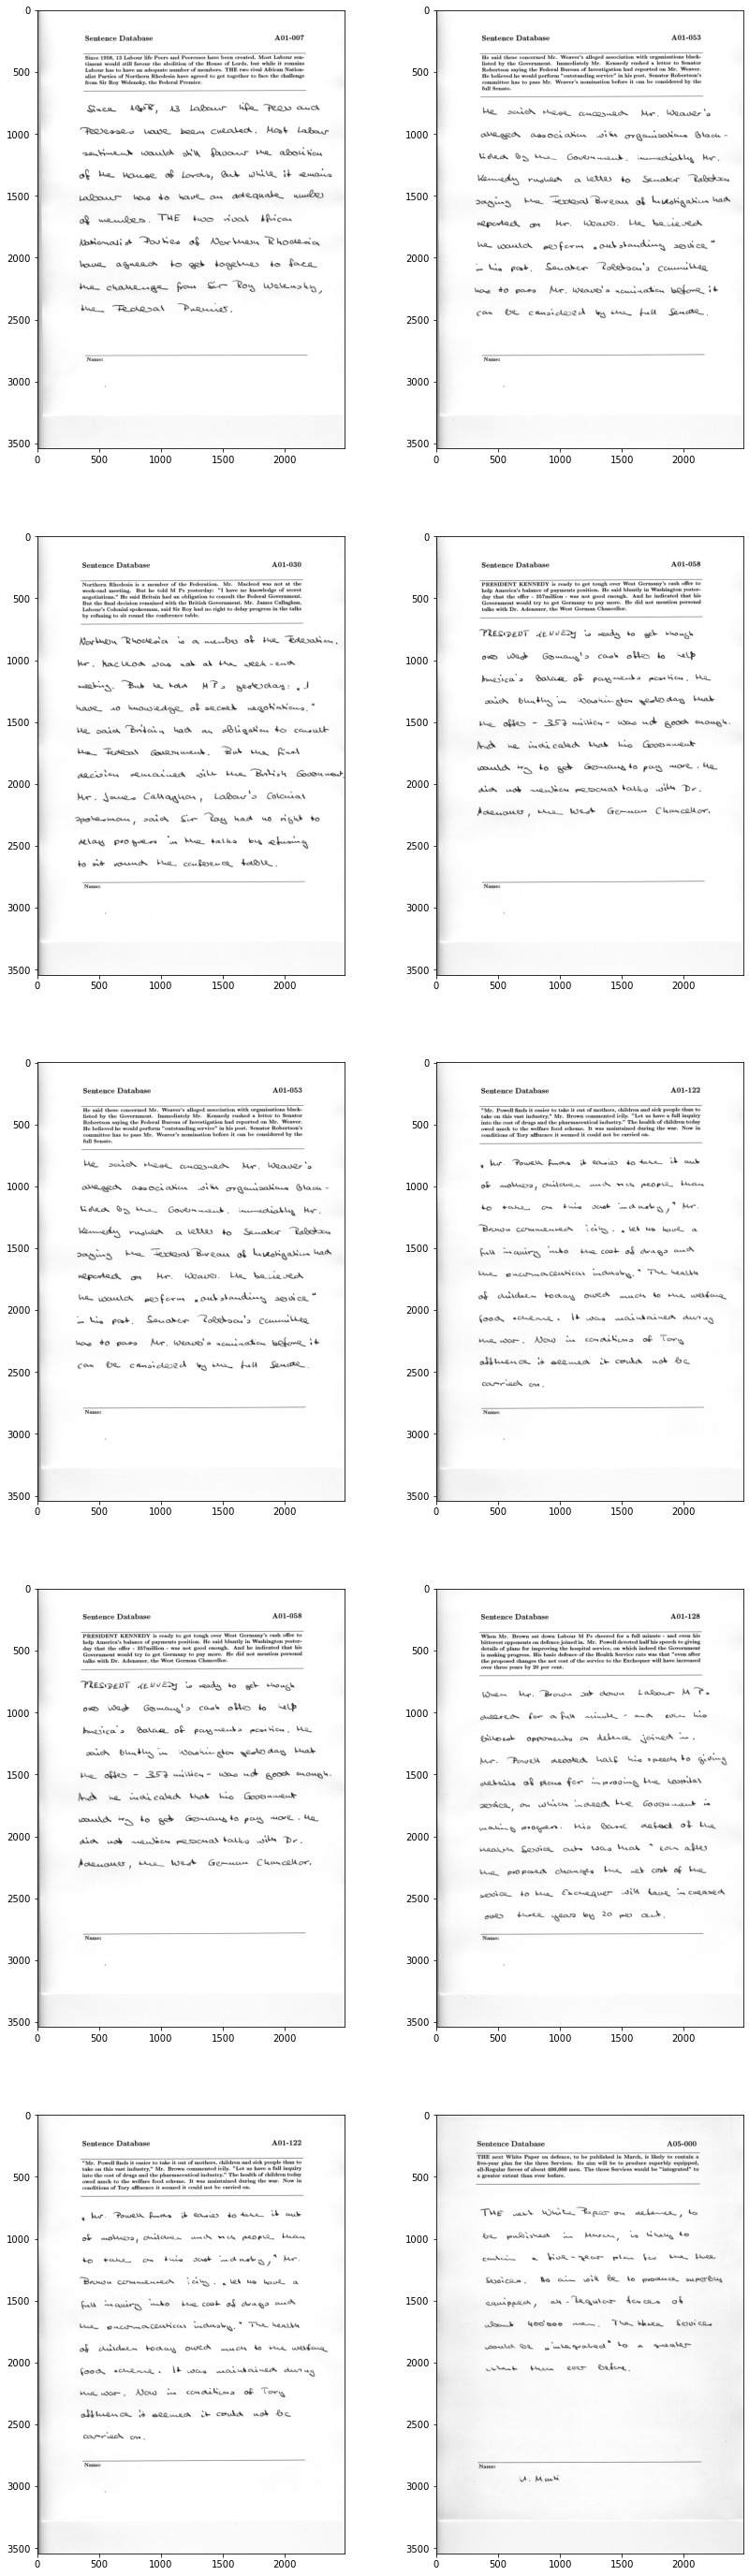

In [106]:
n_rows = 5
n_col = 2
n_images = n_rows * n_col
rand_list = np.sort(np.random.randint(0, first_writer_df.shape[0], n_images))


fig, ax = plt.subplots(n_rows,n_col, figsize=(14,50))
for i in range(n_rows):
    for j in range(n_col):
        img = plt.imread(get_form_img_path_by_word_id(first_writer_df.word_id.iloc[rand_list[i+ j * n_col]]))
        ax[i, j].imshow(img, cmap = 'gray') ;